# Testing atom mapping strengths for JACS dataset

In [1]:
import numpy as np
from perses import utils
import openeye.oechem as oechem
import openeye.oedepict as oedepict
from perses.app.relative_setup import RelativeFEPSetup
from IPython.display import Image, display


import logging, sys
logging.disable(sys.maxsize)

## Classes that contain all the info on the targets and maps

In [2]:
class Thrombin(object):
    name = 'Thrombin'
    thrombin = ['1b','1d','3b','1a','6a','7a','3a','5','6b','6e','1c']
    base_id = 3
    base_bfe = -7.48
    name_to_index = {}
    index_to_name = {}
    for i,lig in enumerate(thrombin):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('1d','6e'),('1d','5'),('1b','3b'),('6a','1b'),('1b','1c'),('1d','1c'),('1b','1a'),('1a','5'),('3a','1d'),('6a','6b'),('1d','7a'),('1b','7a'),('3a','1b'),('1d','1a'),('1a','3b'),('6e','6b')]
    
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))

    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None

class Mcl1(object):
    name = 'Mcl1'
    mcl1 = ['26','48','33','46','35','31','52','68','32','38','51','50','28','66','39','37','30','54','44','23','29','40','62','61','49','64','41','65','58','63','27','47','57','56','53','36','60','45','42','67','34','43']
    name_to_index = {}
    index_to_name = {}
    base_id = 19
    base_bfe = -8.83
    for i,lig in enumerate(mcl1):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('50','60'), ('56','35'), ('65','60'), ('26','57'), ('58','60'), ('62','45'), ('60','36'), ('30','27'), ('33','27'), ('43','27'), ('67','58'), ('67','32'), ('30','40'), ('38','60'), ('41','35'), ('54','23'), ('56','60'), ('66','42'), ('29','40'), ('26','44'), ('49','35'), ('29','35'), ('42','51'), ('39','32'), ('35','37'), ('28','35'), ('35','53'), ('67','63'), ('27','45'), ('41','32'), ('67','53'), ('35','33'), ('27','46'), ('66','23'), ('67','61'), ('57','23'), ('30','35'), ('61','60'), ('67','31'), ('32','46'), ('35','60'), ('31','35'), ('62','26'), ('35','36'), ('26','64'), ('38','35'), ('35','34'), ('29','27'), ('48','27'), ('68','45'), ('63','60'), ('54','42'), ('44','23'), ('28','27'), ('67','27'), ('52','60'), ('27','23'), ('49','67'), ('28','47'), ('67','52'), ('30','48'), ('67','35'), ('32','34'), ('65','67'), ('67','50'), ('35','39'), ('43','47'), ('67','37'), ('42','64'), ('51','45'), ('68','23')]
    
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None

class Bace(object):
    name = 'Bace'
    bace = ['CAT-13f','CAT-13d','CAT-4c','CAT-13b','CAT-4l','CAT-13m','CAT-4k','CAT-13n','CAT-13o','CAT-13a','CAT-13k','CAT-17a','CAT-17f','CAT-13i','CAT-17d','CAT-13c','CAT-17c','CAT-24','CAT-17i','CAT-13g','CAT-4j','CAT-17b','CAT-4p','CAT-17h','CAT-4b','CAT-17g','CAT-4d','CAT-4m','CAT-13e','CAT-4n','CAT-4o','CAT-4a','CAT-13j','CAT-13h','CAT-4i','CAT-17e']
    name_to_index = {}
    index_to_name = {}
    base_id = 9
    base_bfe = -8.83
    for i,lig in enumerate(bace):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('CAT-13b','CAT-17g'), ('CAT-13a','CAT-17g'), ('CAT-13e','CAT-17g'), ('CAT-4m','CAT-4c'), ('CAT-13k','CAT-4d'), ('CAT-24','CAT-17e'), ('CAT-13g','CAT-17g'), ('CAT-13d','CAT-13h'), ('CAT-13a','CAT-17i'), ('CAT-4m','CAT-13j'), ('CAT-13a','CAT-13m'), ('CAT-4l','CAT-13k'), ('CAT-13o','CAT-17i'), ('CAT-4c','CAT-4o'), ('CAT-4j','CAT-4o'), ('CAT-4i','CAT-13m'), ('CAT-24','CAT-17i'), ('CAT-13j','CAT-4o'), ('CAT-4n','CAT-13k'), ('CAT-4o','CAT-4b'), ('CAT-17i','CAT-13f'), ('CAT-17c','CAT-17e'), ('CAT-13k','CAT-4b'), ('CAT-4m','CAT-4j'), ('CAT-13n','CAT-13k'), ('CAT-13d','CAT-17h'), ('CAT-17b','CAT-13d'), ('CAT-4m','CAT-4n'), ('CAT-4m','CAT-13k'), ('CAT-13c','CAT-17i'), ('CAT-4a','CAT-4o'), ('CAT-13h','CAT-17i'), ('CAT-4o','CAT-4d'), ('CAT-17g','CAT-17c'), ('CAT-4a','CAT-13k'), ('CAT-13d','CAT-17d'), ('CAT-17g','CAT-17f'), ('CAT-13e','CAT-17i'), ('CAT-13d','CAT-13b'), ('CAT-17g','CAT-13i'), ('CAT-4m','CAT-13m'), ('CAT-17g','CAT-13c'), ('CAT-17i','CAT-17a'), ('CAT-13d','CAT-13f'), ('CAT-17f','CAT-17e'), ('CAT-13d','CAT-17a'), ('CAT-17g','CAT-17d'), ('CAT-13n','CAT-13a'), ('CAT-13o','CAT-17h'), ('CAT-17b','CAT-17e'), ('CAT-4k','CAT-4o'), ('CAT-4m','CAT-4l'), ('CAT-4m','CAT-4k'), ('CAT-13n','CAT-4i'), ('CAT-13g','CAT-17i'), ('CAT-4p','CAT-13k'), ('CAT-4m','CAT-4p'), ('CAT-13d','CAT-13i')]    
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None        

class Jnk1(object):
    name = 'Jnk1'
    jnk1 = ['18629-1','18634-1','18628-1','18660-1','18624-1','18633-1','18635-1','17124-1','18625-1','18659-1','18637-1','18638-1','18652-1','18627-1','18658-1','18630-1','18639-1','18631-1','18632-1','18636-1','18626-1']
    name_to_index = {}
    index_to_name = {}
    base_id = 7
    base_bfe = -9.68
    for i,lig in enumerate(jnk1):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('17124-1','18634-1'), ('18626-1','18624-1'), ('18636-1','18625-1'), ('18632-1','18624-1'), ('18635-1','18625-1'), ('18626-1','18658-1'), ('18639-1','18658-1'), ('18626-1','18625-1'), ('18638-1','18658-1'), ('18628-1','18624-1'), ('18631-1','18660-1'), ('18638-1','18634-1'), ('18626-1','18632-1'), ('18626-1','18630-1'), ('18631-1','18624-1'), ('18629-1','18627-1'), ('18634-1','18637-1'), ('18626-1','18627-1'), ('18631-1','18652-1'), ('18637-1','18631-1'), ('18626-1','18634-1'), ('18633-1','18624-1'), ('17124-1','18631-1'), ('18627-1','18630-1'), ('18659-1','18634-1'), ('18636-1','18624-1'), ('18626-1','18628-1'), ('18626-1','18660-1'), ('18626-1','18659-1'), ('18639-1','18634-1'), ('18635-1','18624-1')]
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None  
        
class Tyk2(object):
    name = 'Tyk2'
    tyk2 = []
    name_to_index = {}
    index_to_name = {}
    base_id = 19
    base_bfe = -9.54
    for i,lig in enumerate(tyk2):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = []
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None  

class Cdk2(object):
    name = 'Cdk2'
    cdk2 = ['30','28' ,'1oiy' ,'1oi9' ,'32' ,'1oiu' ,'29' ,'1h1r' ,'21' ,'26' ,'1h1s' ,'31' ,'20' ,'22' ,'17' ,'1h1q']
    name_to_index = {}
    index_to_name = {}
    base_id = 14
    base_bfe = -7.04
    for i,lig in enumerate(cdk2):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('22','1h1r') ,('17','1h1q') ,('17','21') ,('17','22') ,('20','1h1q') ,('26','1h1q') ,('26','1oi9') ,('28','26') ,('28','31') ,('29','26') ,('30','26') ,('30','31') ,('31','32') ,('1h1r','1oi9') ,('1h1r','21') ,('1h1s','1oiy') ,('1h1s','26') ,('1oi9','20') ,('1oiu','26') ,('1oiu','1h1q') ,('1oiy','1oi9') ,('1oiy','32') ,('1oiy','29') ,('1oiy','31') ,('1oiy','1h1q')]
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None          

## Adapted render mapping function to highlight unique atoms in systems

### Pink = unique old
### Purple = unique old
### Green = core, but changing element

In [3]:
def render_atom_mapping(filename, molecule1, molecule2, new_to_old_atom_map, width=1200, height=600):
    """
    Render the atom mapping to a PDF file.

    Parameters
    ----------
    filename : str
        The PDF filename to write to.
    molecule1 : openeye.oechem.OEMol
        Initial molecule
    molecule2 : openeye.oechem.OEMol
        Final molecule
    new_to_old_atom_map : dict of int
        new_to_old_atom_map[molecule2_atom_index] is the corresponding molecule1 atom index
    width : int, optional, default=1200
        Width in pixels
    height : int, optional, default=1200
        Height in pixels

    """
    from openeye import oechem

    # Make copies of the input molecules
    molecule1, molecule2 = oechem.OEGraphMol(molecule1), oechem.OEGraphMol(molecule2)

    oechem.OEGenerate2DCoordinates(molecule1)
    oechem.OEGenerate2DCoordinates(molecule2)

    # Add both to an OEGraphMol reaction
    rmol = oechem.OEGraphMol()
    rmol.SetRxn(True)
    def add_molecule(mol):
        # Add atoms
        new_atoms = list()
        old_to_new_atoms = dict()
        for old_atom in mol.GetAtoms():
            new_atom = rmol.NewAtom(old_atom.GetAtomicNum())
            new_atoms.append(new_atom)
            old_to_new_atoms[old_atom] = new_atom
        # Add bonds
        for old_bond in mol.GetBonds():
            rmol.NewBond(old_to_new_atoms[old_bond.GetBgn()], old_to_new_atoms[old_bond.GetEnd()], old_bond.GetOrder())
        return new_atoms, old_to_new_atoms

    [new_atoms_1, old_to_new_atoms_1] = add_molecule(molecule1)
    [new_atoms_2, old_to_new_atoms_2] = add_molecule(molecule2)

    # Label reactant and product
    for atom in new_atoms_1:
        atom.SetRxnRole(oechem.OERxnRole_Reactant)
    for atom in new_atoms_2:
        atom.SetRxnRole(oechem.OERxnRole_Product)
    
    core1 = oechem.OEAtomBondSet()
    core2 = oechem.OEAtomBondSet()
    # add all atoms to the set
    core1.AddAtoms(new_atoms_1)
    core2.AddAtoms(new_atoms_2)
    # Label mapped atoms
    core_change = oechem.OEAtomBondSet()
#     core_change2 = oechem.OEAtomBondSet()
    index =1
    for (index2, index1) in new_to_old_atom_map.items():
        new_atoms_1[index1].SetMapIdx(index)
        new_atoms_2[index2].SetMapIdx(index)
        # now remove the atoms that are core, so only uniques are highlighted
        core1.RemoveAtom(new_atoms_1[index1])
        core2.RemoveAtom(new_atoms_2[index2])
        if new_atoms_1[index1].GetAtomicNum() != new_atoms_2[index2].GetAtomicNum():
            # this means the element type is changing   
            core_change.AddAtom(new_atoms_1[index1])
            core_change.AddAtom(new_atoms_2[index2])            
        index += 1
    # Set up image options
    itf = oechem.OEInterface()
    oedepict.OEConfigureImageOptions(itf)
    ext = oechem.OEGetFileExtension(filename)
    if not oedepict.OEIsRegisteredImageFile(ext):
        raise Exception('Unknown image type for filename %s' % filename)
    ofs = oechem.oeofstream()
    if not ofs.open(filename):
        raise Exception('Cannot open output file %s' % filename)

    # Setup depiction options
    oedepict.OEConfigure2DMolDisplayOptions(itf, oedepict.OE2DMolDisplaySetup_AromaticStyle)
    opts = oedepict.OE2DMolDisplayOptions(width, height, oedepict.OEScale_AutoScale)
    oedepict.OESetup2DMolDisplayOptions(opts, itf)
    opts.SetBondWidthScaling(True)
    opts.SetAtomPropertyFunctor(oedepict.OEDisplayAtomMapIdx())
    opts.SetAtomColorStyle(oedepict.OEAtomColorStyle_WhiteMonochrome)

    # Depict reaction with component highlights
    oechem.OEGenerate2DCoordinates(rmol)
    rdisp = oedepict.OE2DMolDisplay(rmol, opts)
    
    oedepict.OEAddHighlighting(rdisp, oechem.OEColor(oechem.OEPink),oedepict.OEHighlightStyle_Stick, core1)
    oedepict.OEAddHighlighting(rdisp, oechem.OEColor(oechem.OEPurple),oedepict.OEHighlightStyle_Stick, core2)
    oedepict.OEAddHighlighting(rdisp, oechem.OEColor(oechem.OEGreen),oedepict.OEHighlightStyle_Stick, core_change)
    oedepict.OERenderMolecule(ofs, ext, rdisp)
    ofs.close()

In [4]:
def generate_mapping(i,j,ligand_file):
    fe_setup = RelativeFEPSetup(ligand_input = ligand_file,
                            old_ligand_index = i,
                            new_ligand_index = j,
                            forcefield_files = ['gaff.xml'],
                            phases = ['vacuum'])
    return fe_setup 

In [5]:
def plot_all_mappings(target):
    for i,j in target.index_pairs:
        print(target.name, i,j)

        ligand_file = f'/Users/brucemah/bin/perses_jacs_systems/{target.name}/{target.name.capitalize()}_ligands.sdf'
        fe_setup = generate_mapping(i,j,ligand_file)
        
        filename = f'{target.name}_{i}to{j}.png'
        render_atom_mapping(filename,fe_setup._ligand_oemol_old,fe_setup._ligand_oemol_new,
                                                 new_to_old_atom_map=fe_setup.non_offset_new_to_old_atom_map)

        display(Image(filename=filename))

Cdk2 13 7


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 6-( contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))
/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


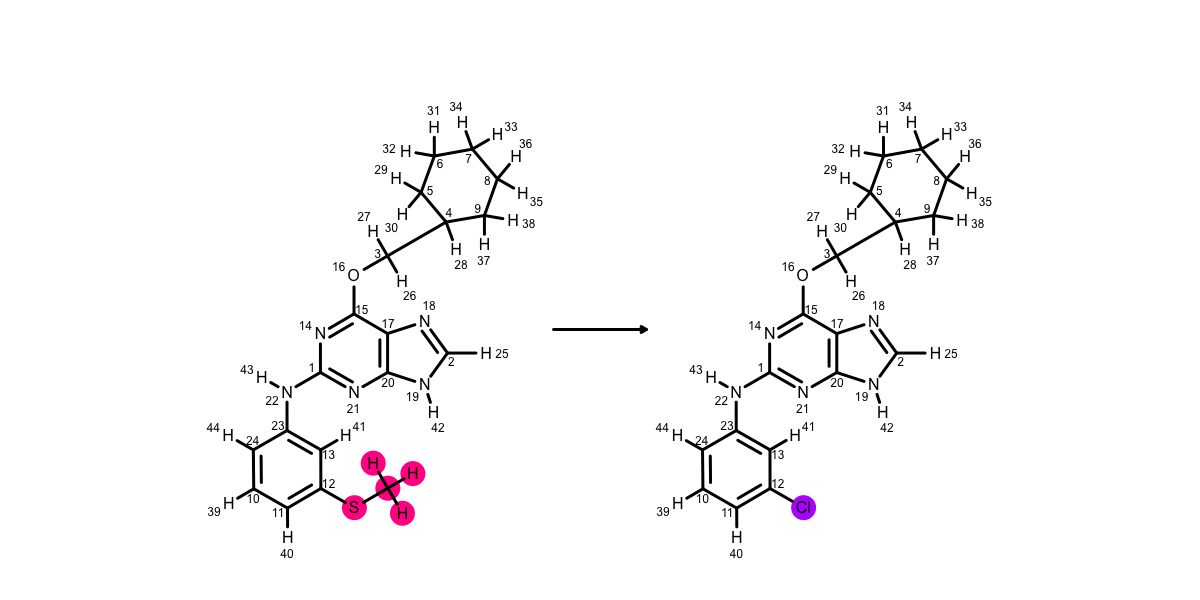

Cdk2 14 15


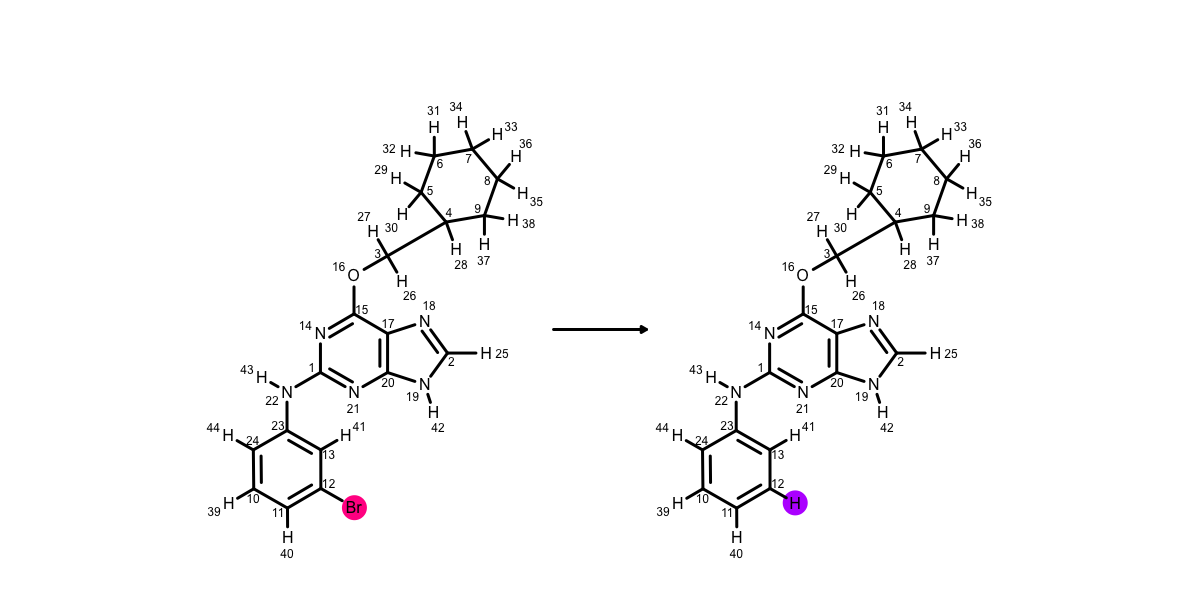

Cdk2 14 8


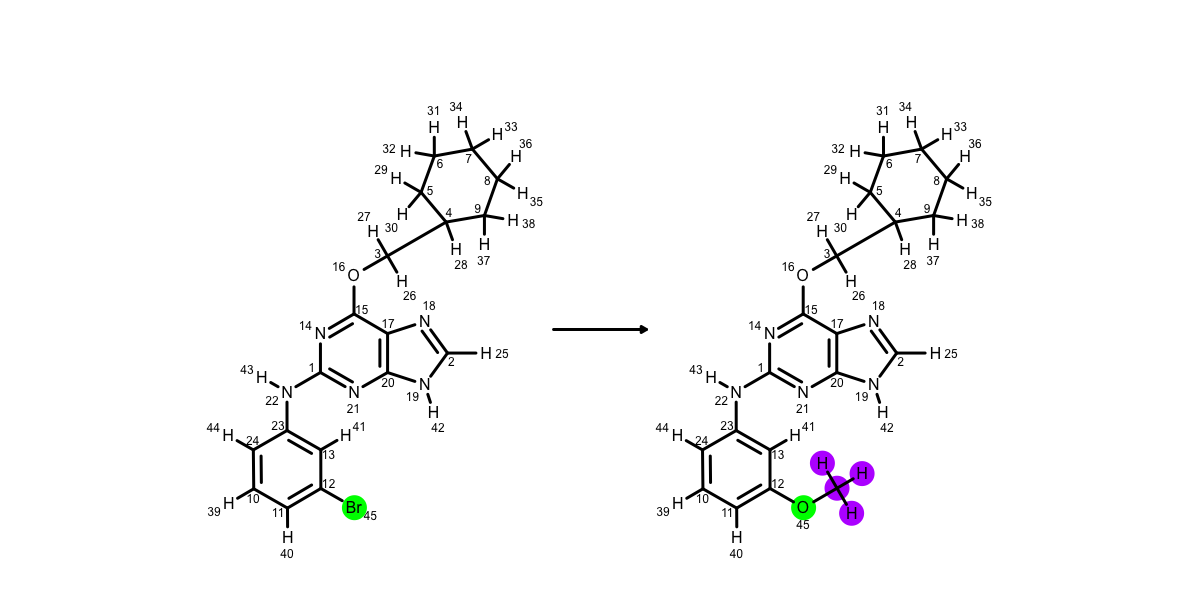

Cdk2 14 13


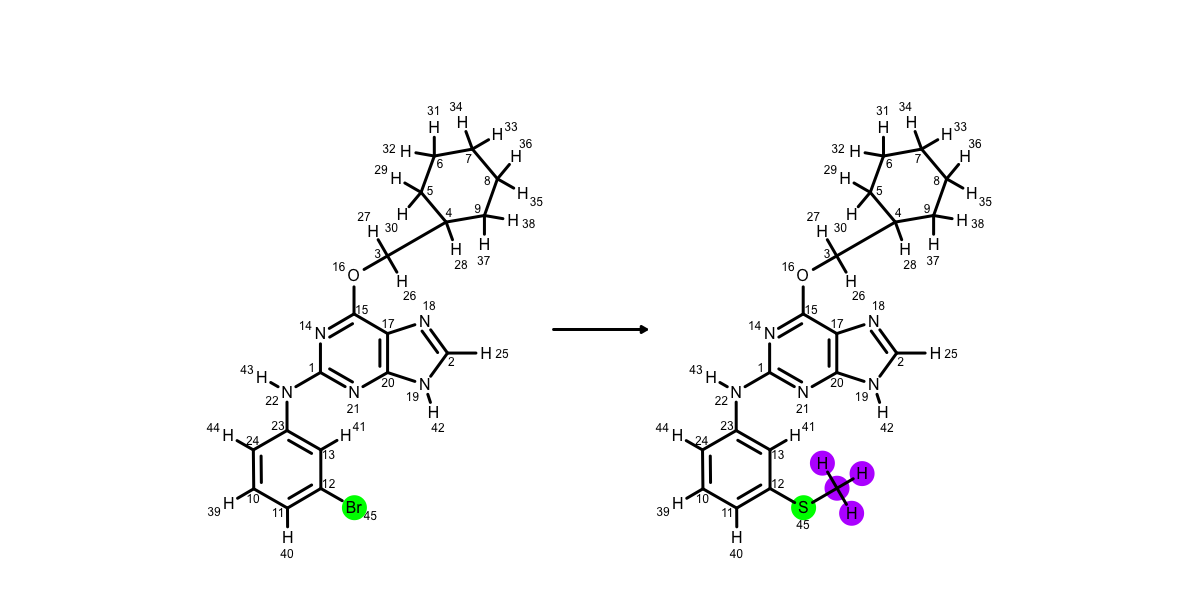

Cdk2 12 15


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue [3- contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


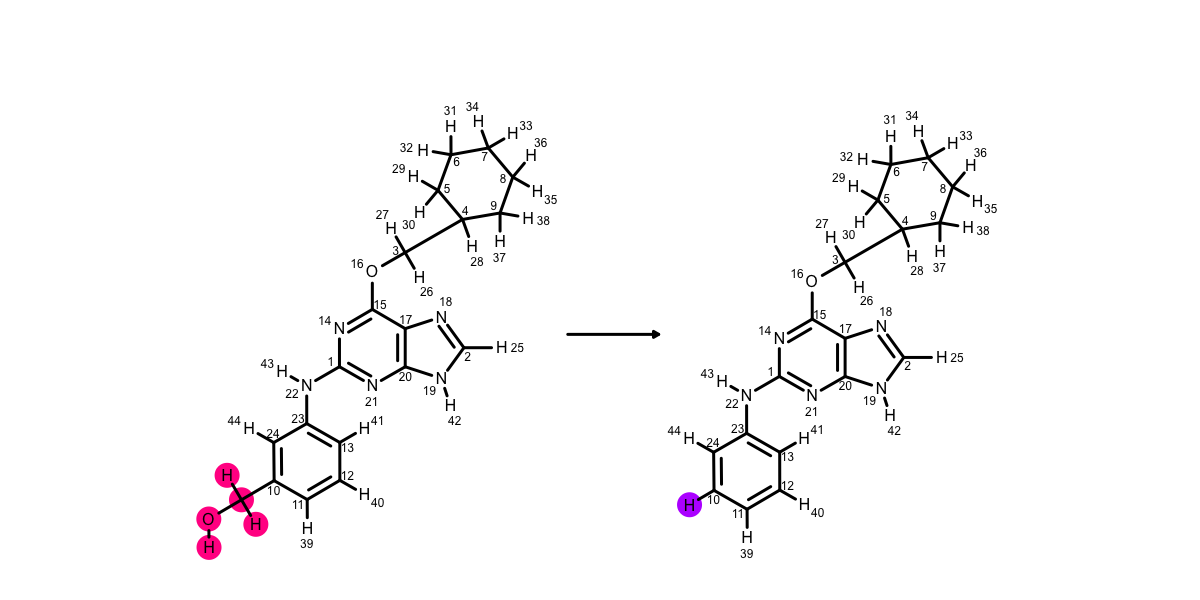

Cdk2 9 15


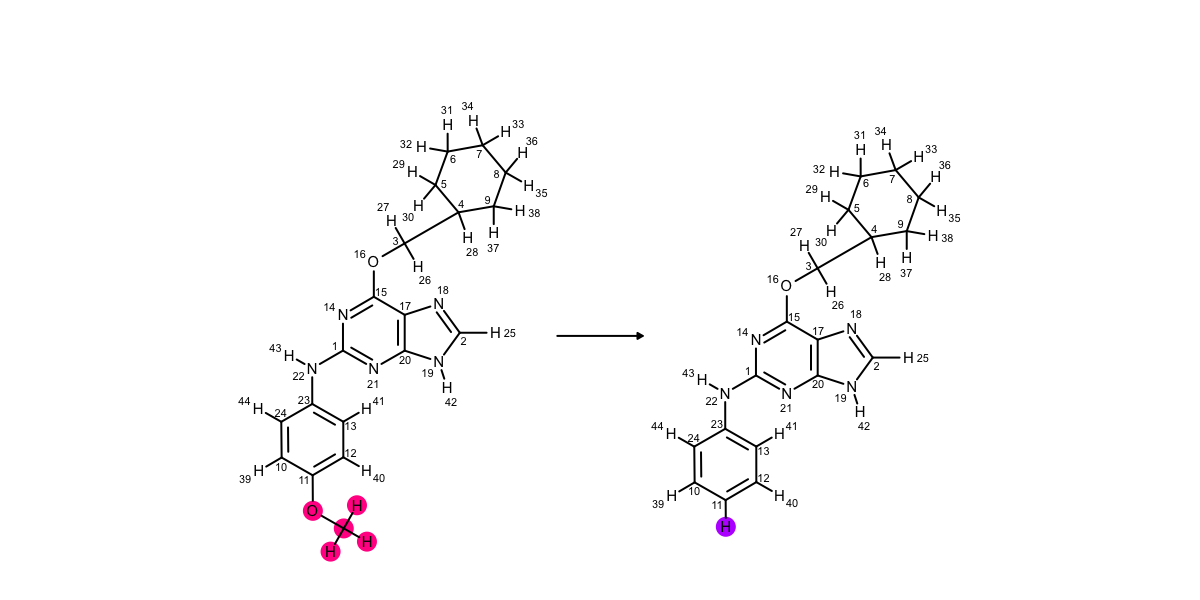

Cdk2 9 3


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 6-( contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))
/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 4-[ contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


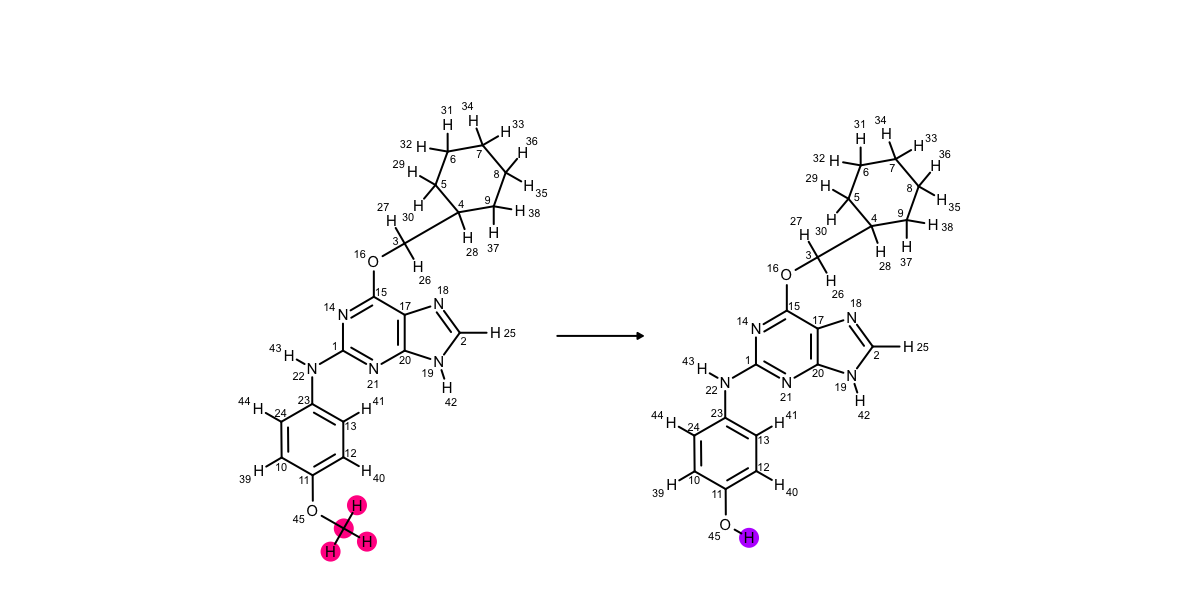

Cdk2 1 9


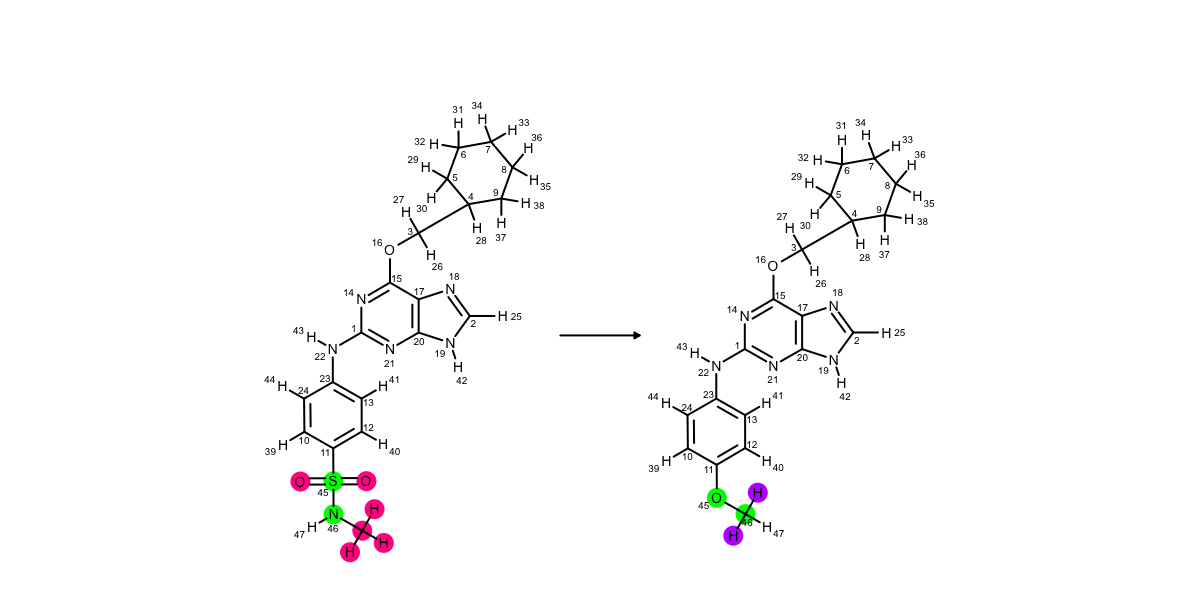

Cdk2 1 11


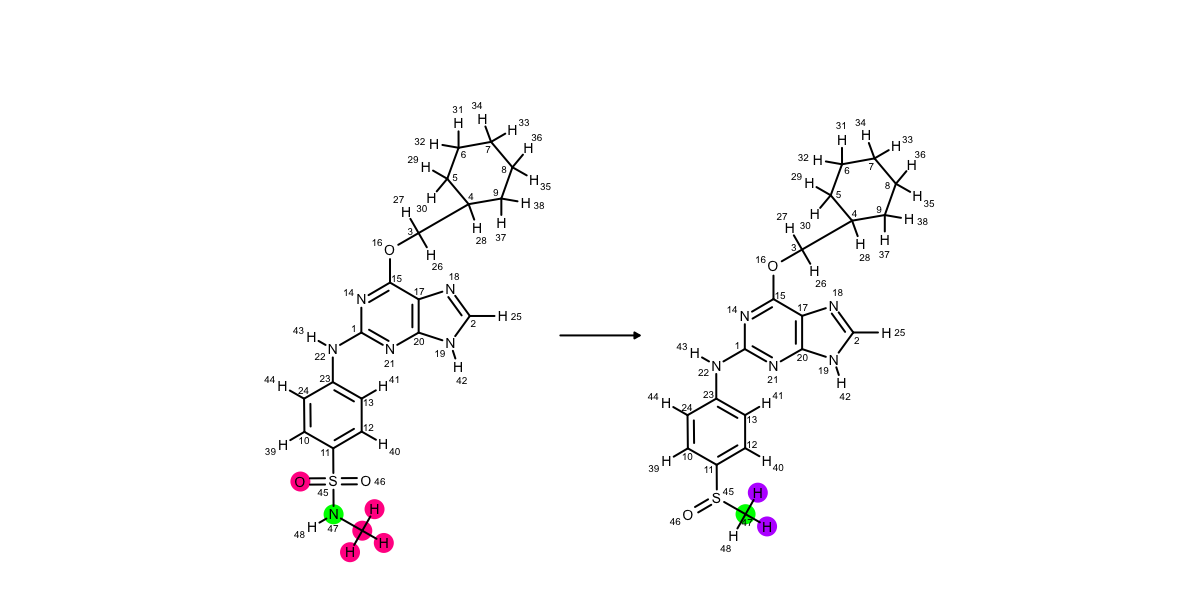

Cdk2 6 9


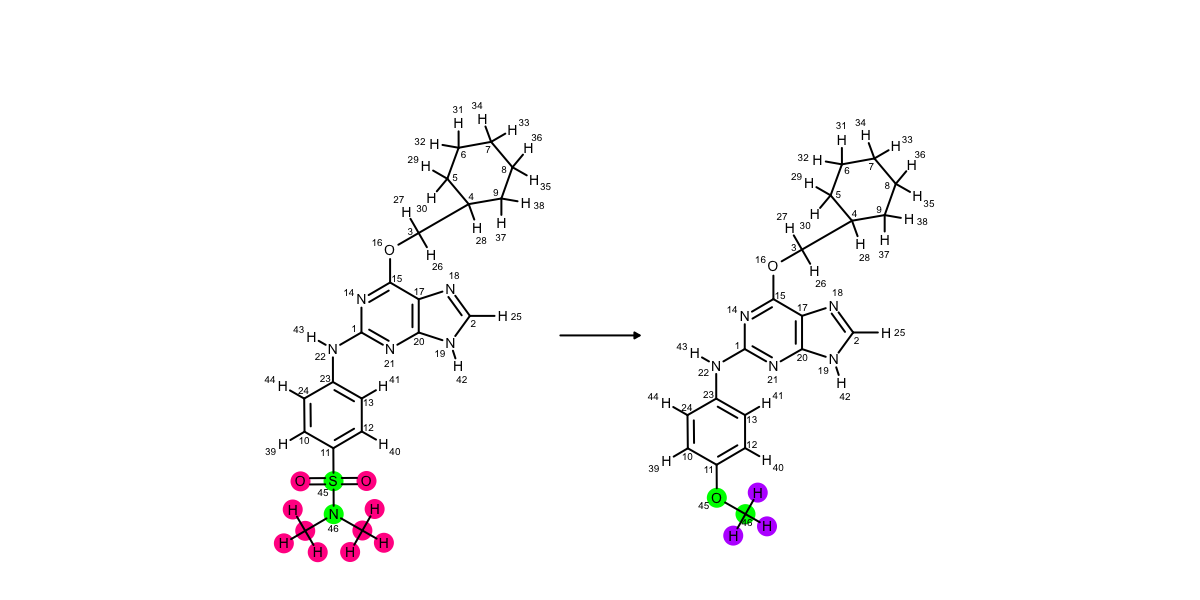

Cdk2 0 9


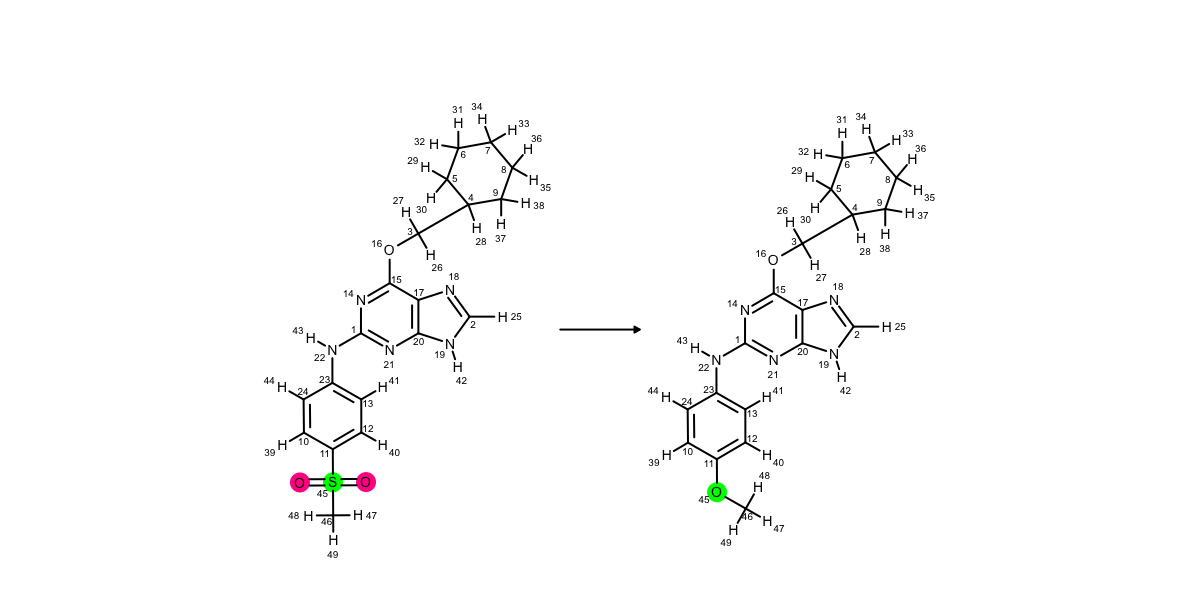

Cdk2 0 11


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 6-( contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


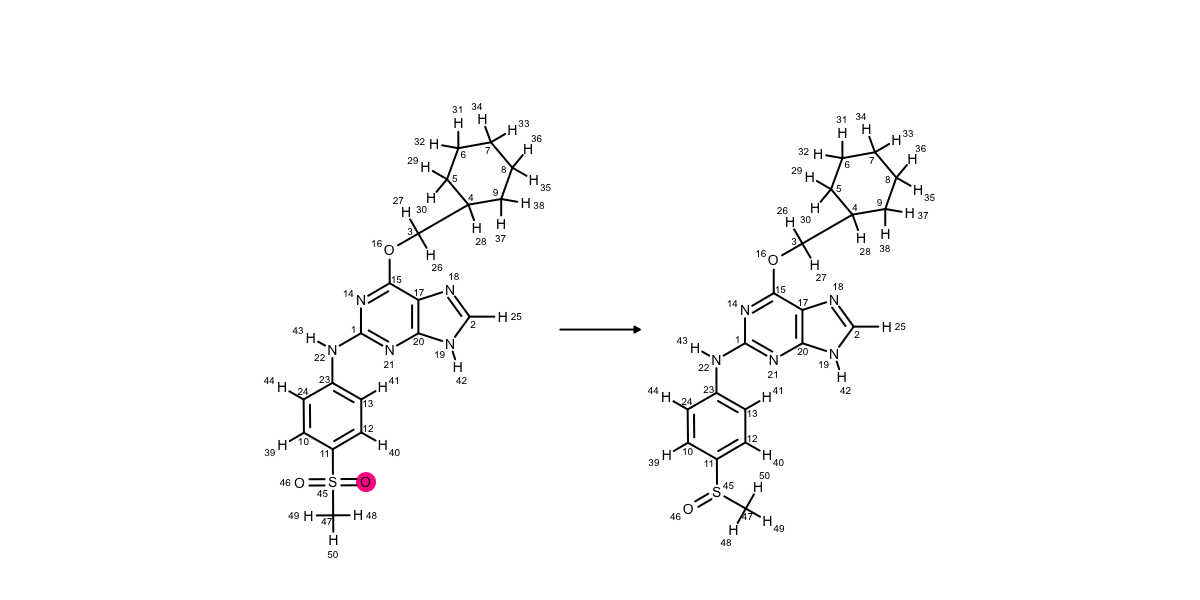

Cdk2 11 4


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 6-( contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))
/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 4-[ contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


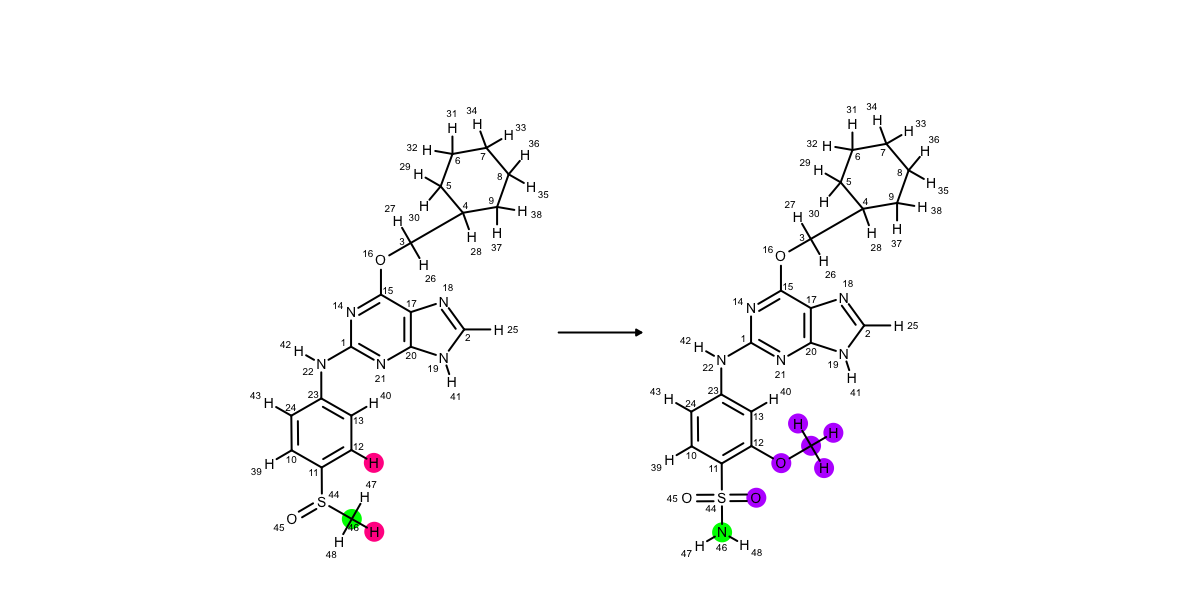

Cdk2 7 3


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


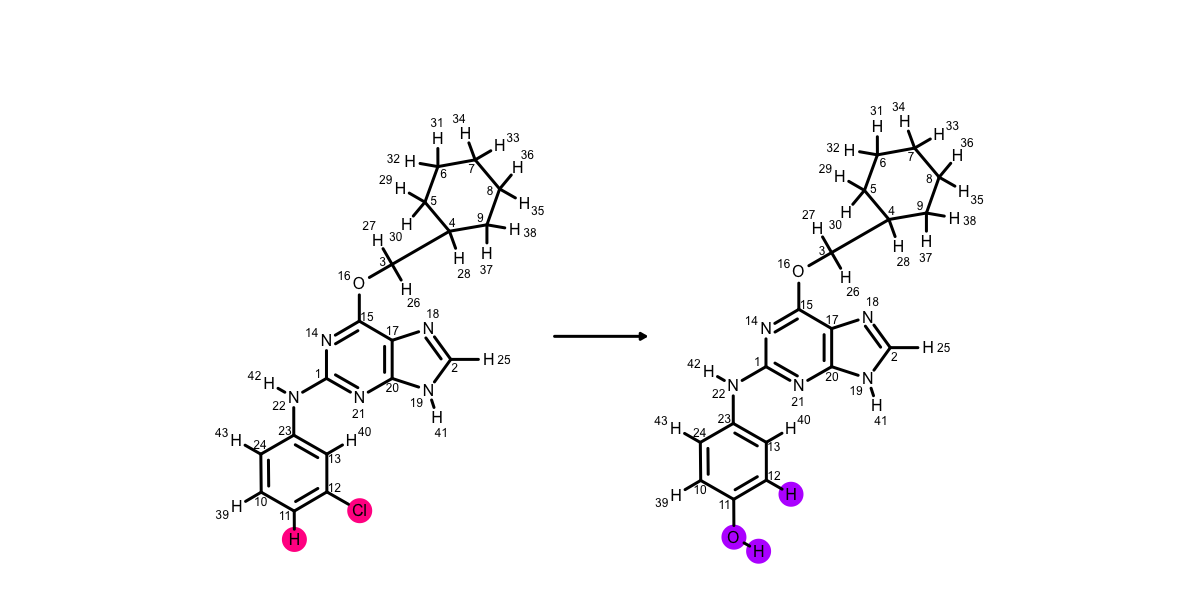

Cdk2 7 8


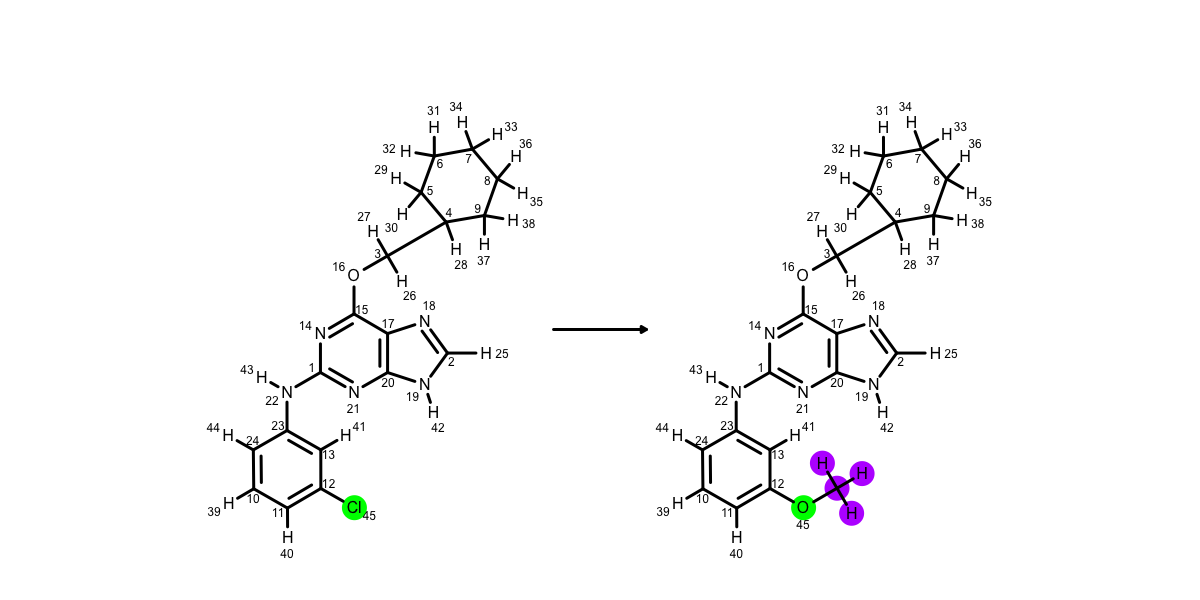

Cdk2 10 2


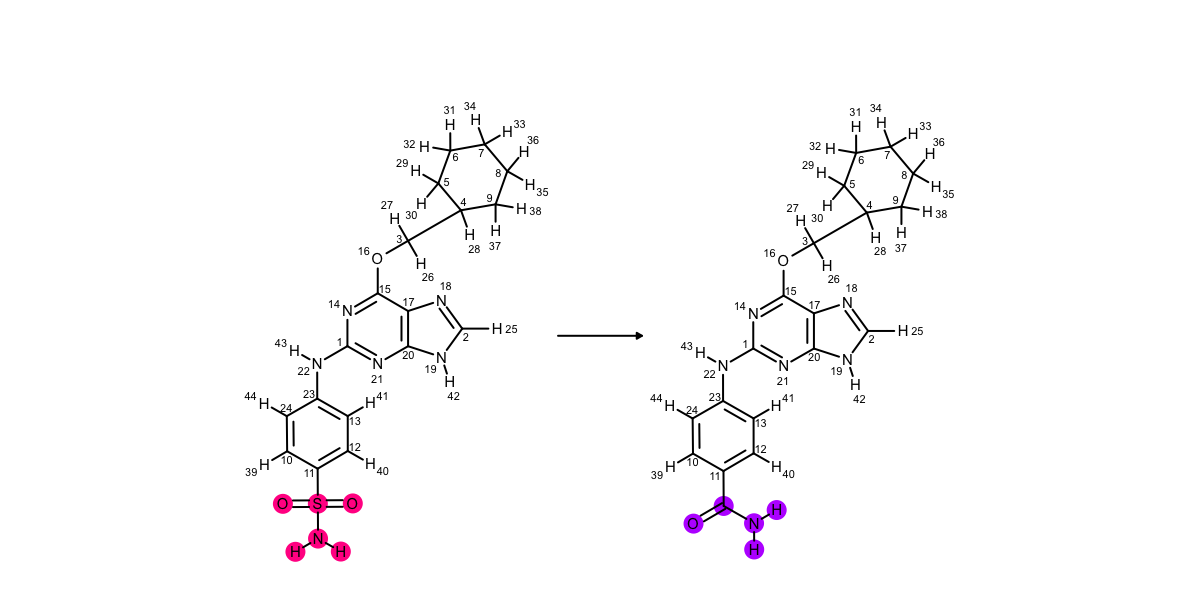

Cdk2 10 9


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 4-[ contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))
/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 6-( contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


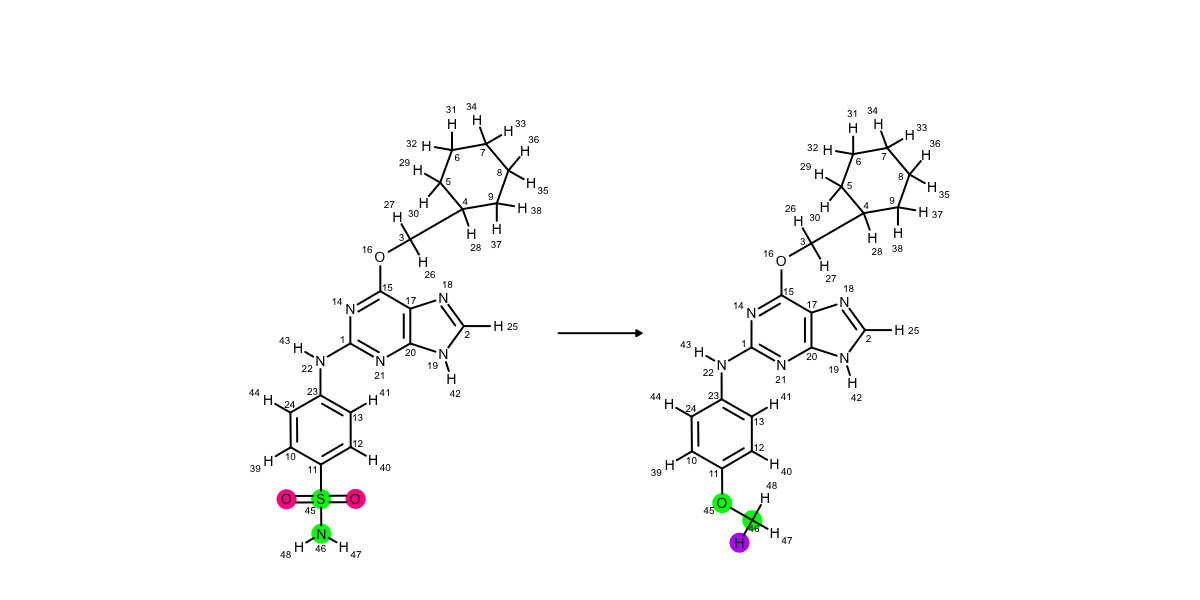

Cdk2 3 12


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue [3- contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


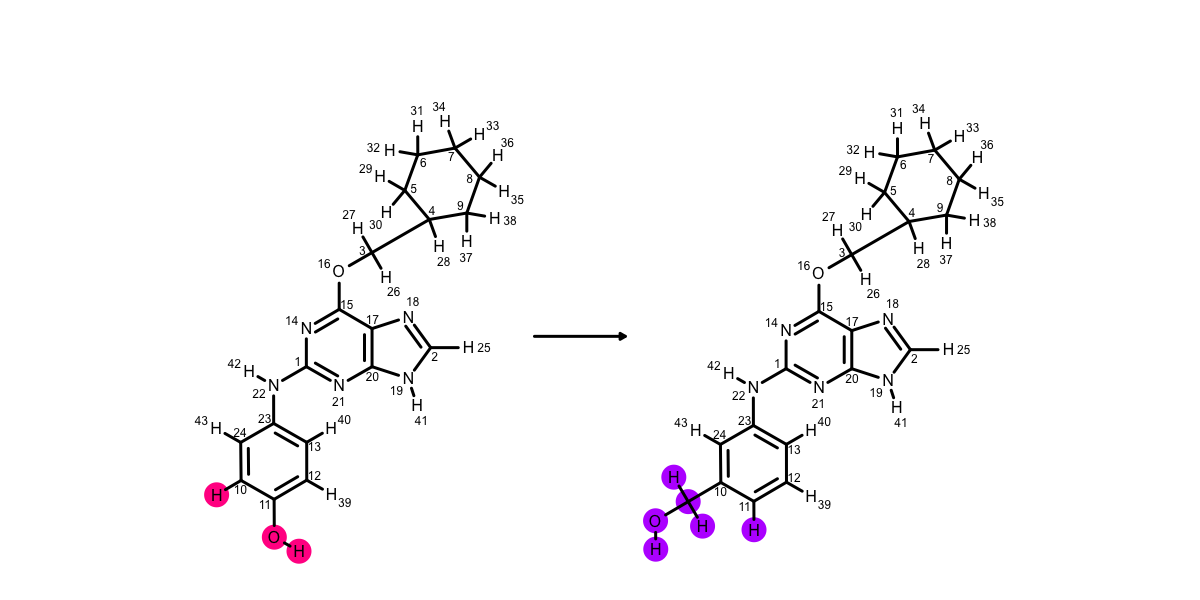

Cdk2 5 9


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 3-[ contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


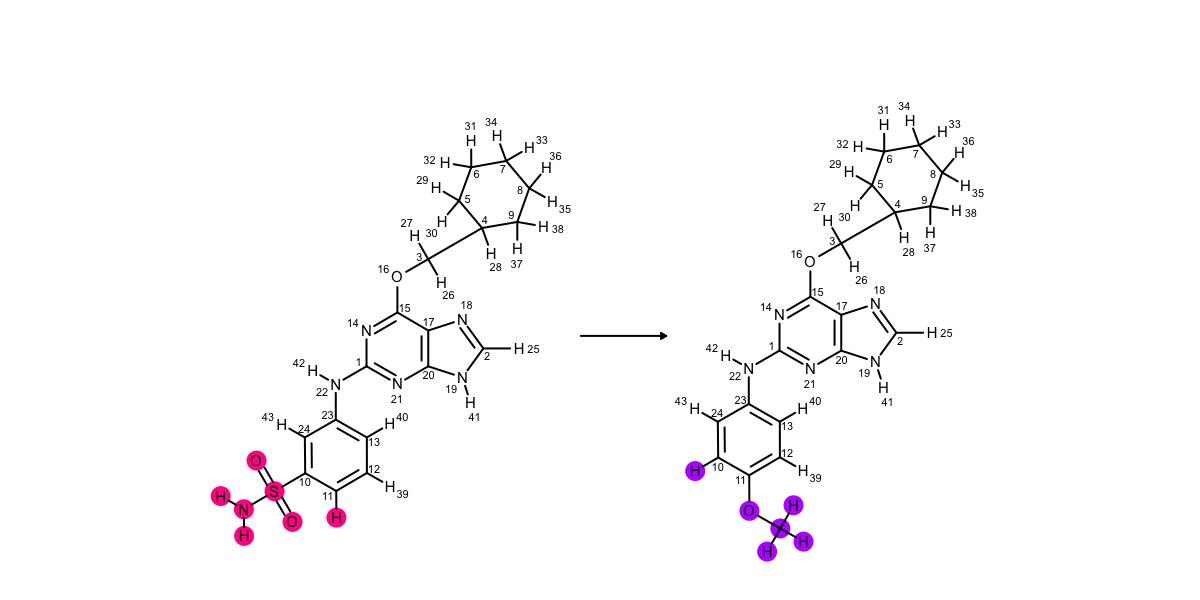

Cdk2 5 15


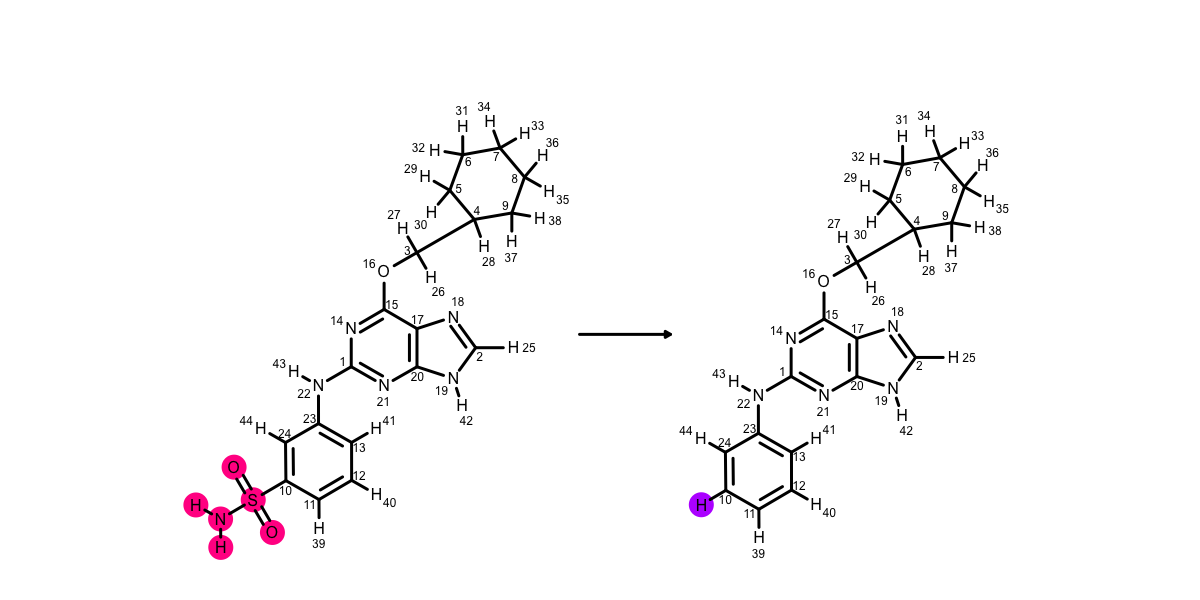

Cdk2 2 3


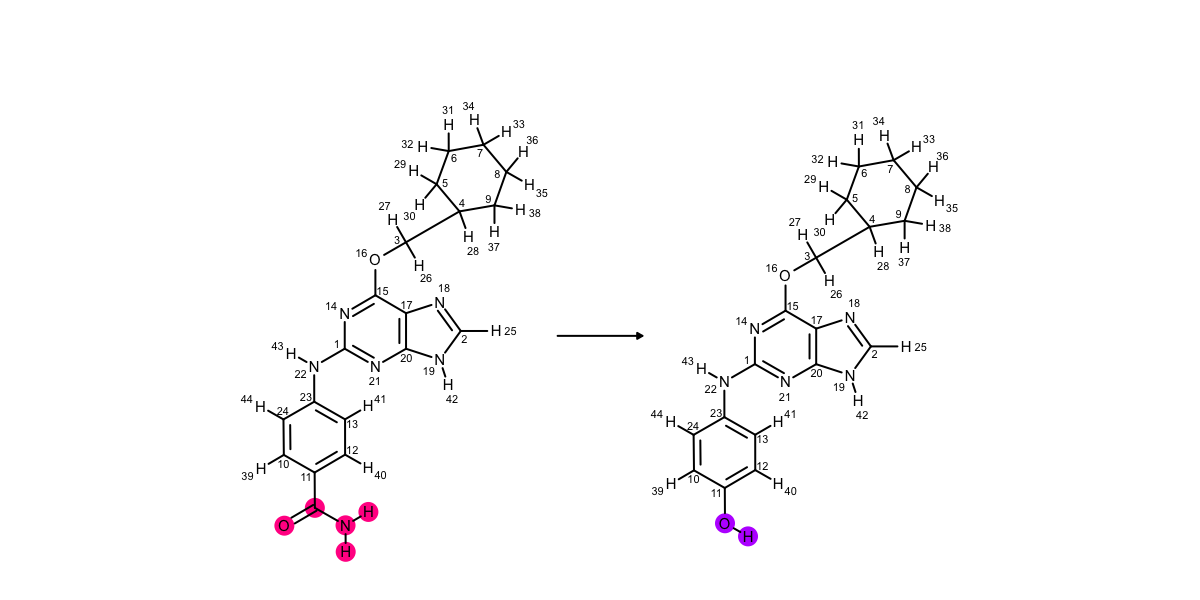

Cdk2 2 4


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 4-[ contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


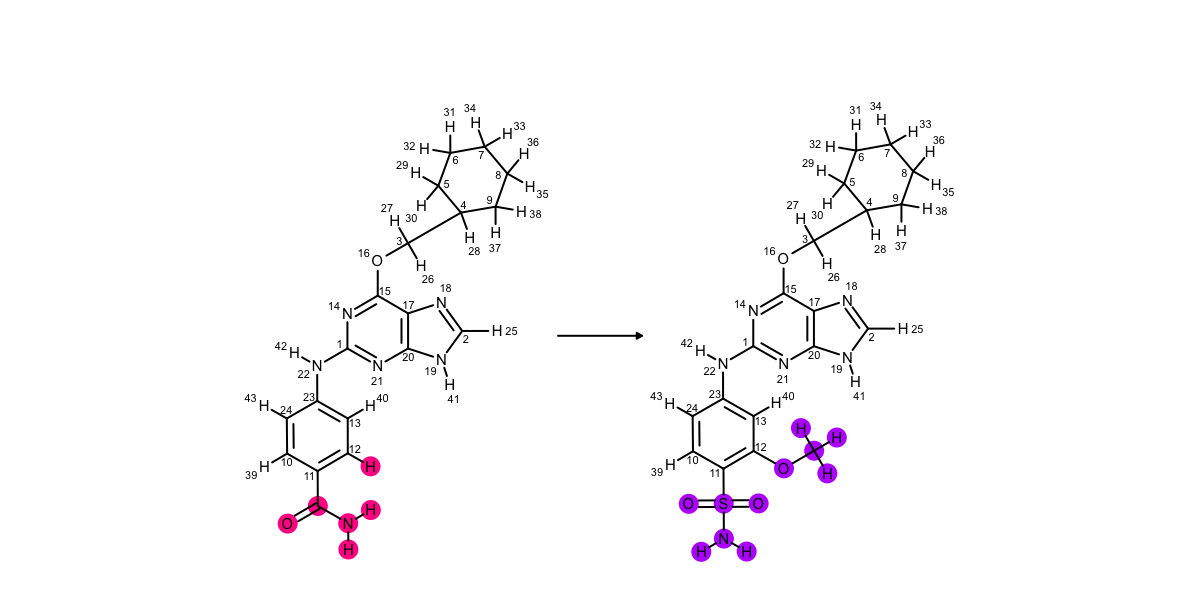

Cdk2 2 6


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 4-[ contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


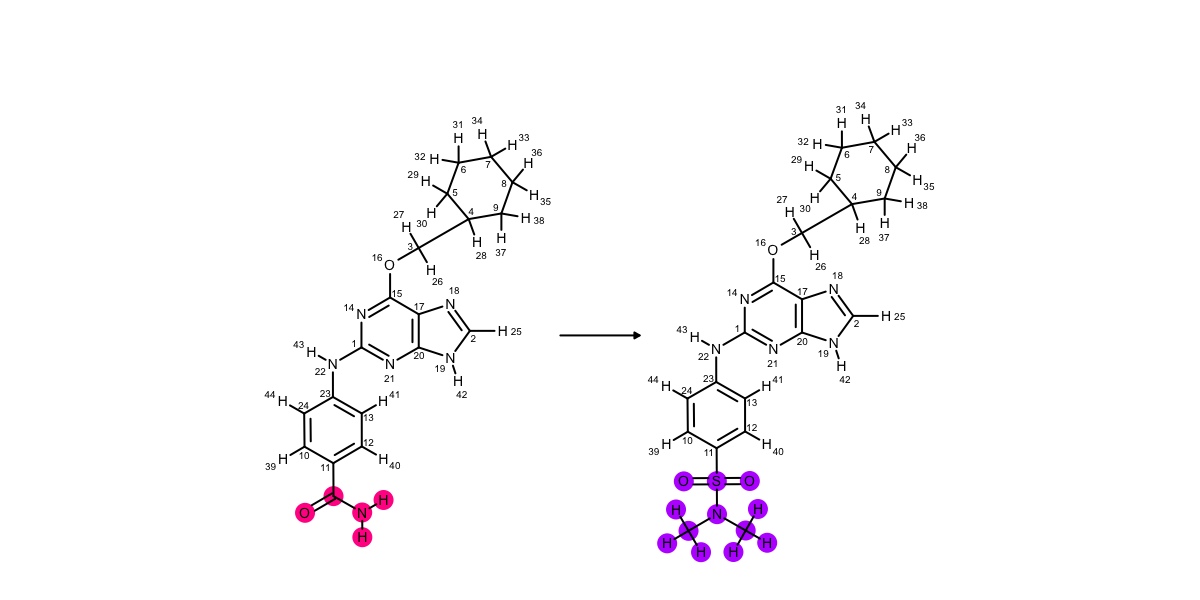

Cdk2 2 11


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 4-[ contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))
/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 6-( contains atom type ca not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


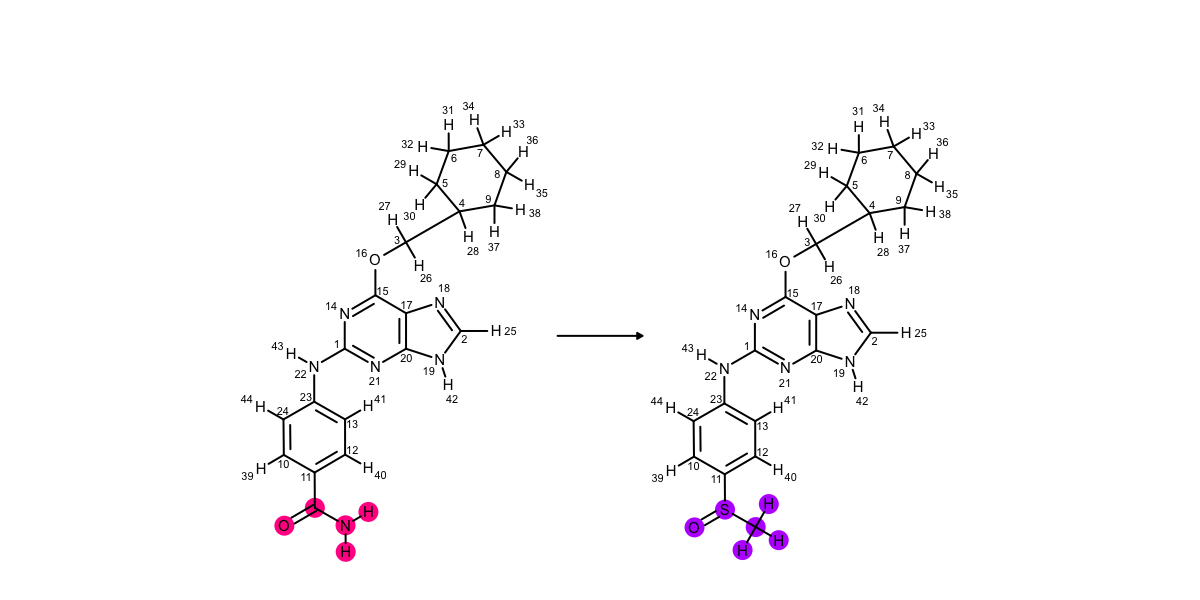

Cdk2 2 15


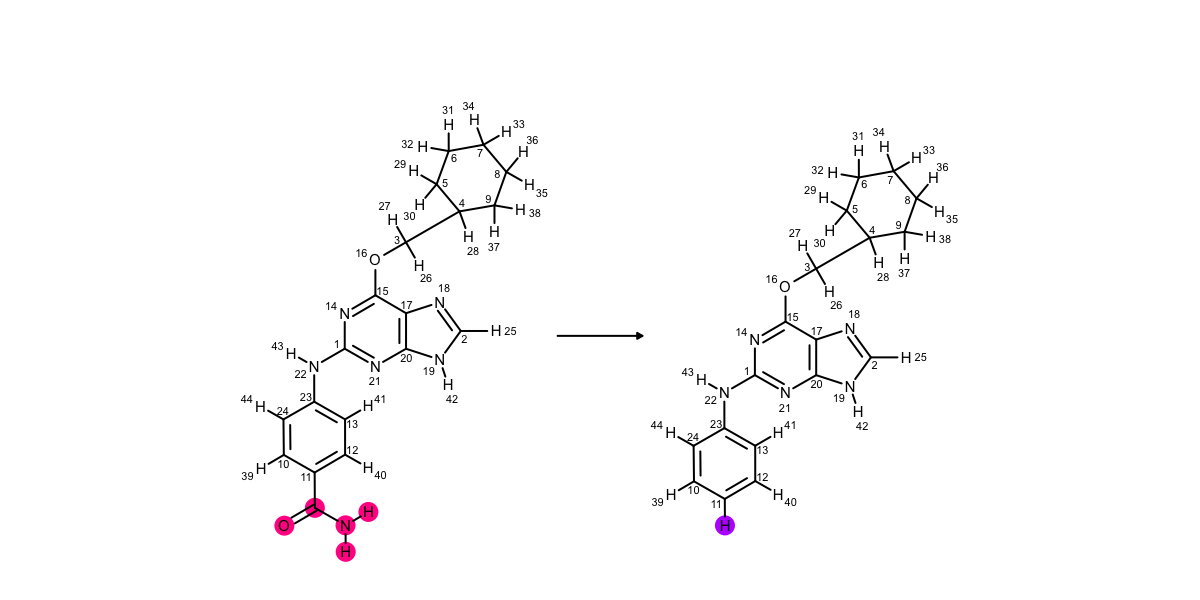

In [6]:
plot_all_mappings(Cdk2)

Jnk1 7 1


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


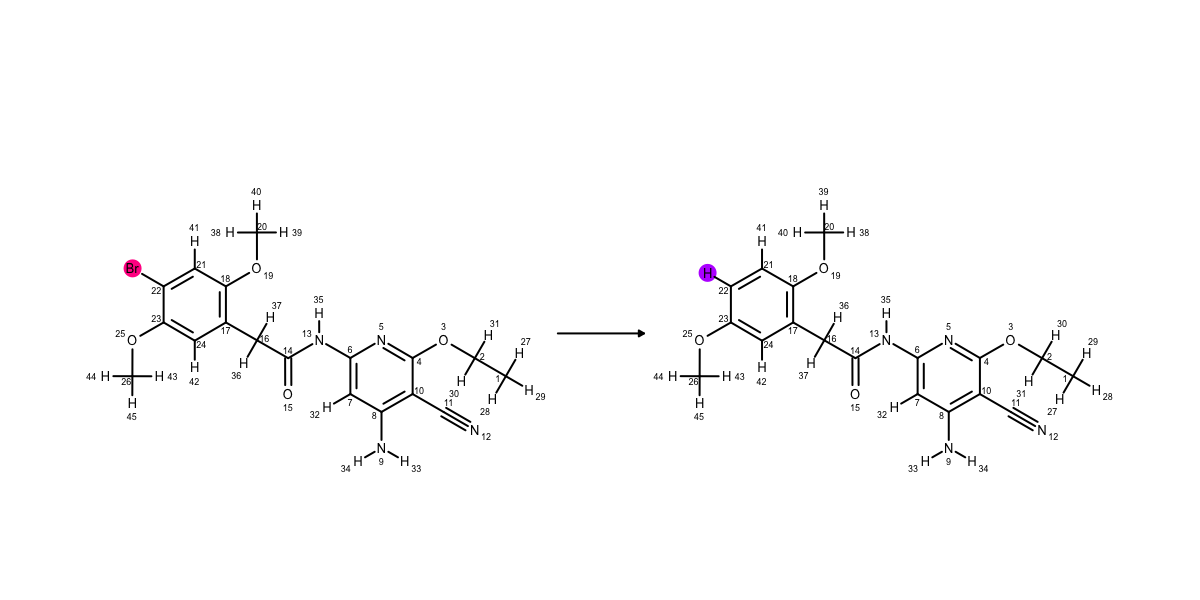

Jnk1 20 4


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


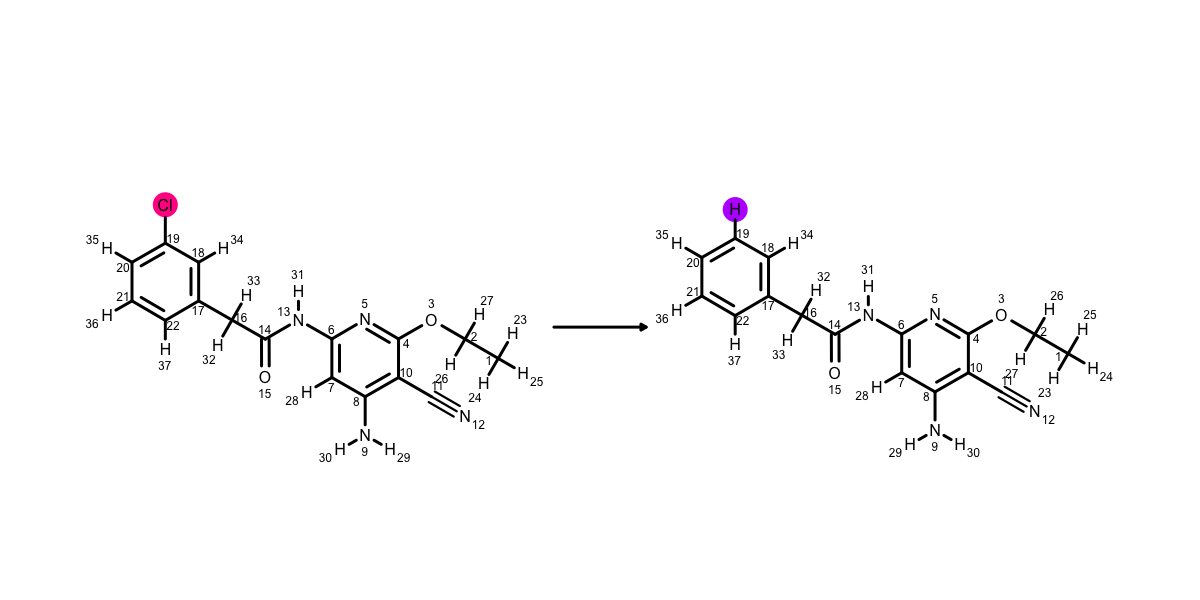

Jnk1 19 8


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


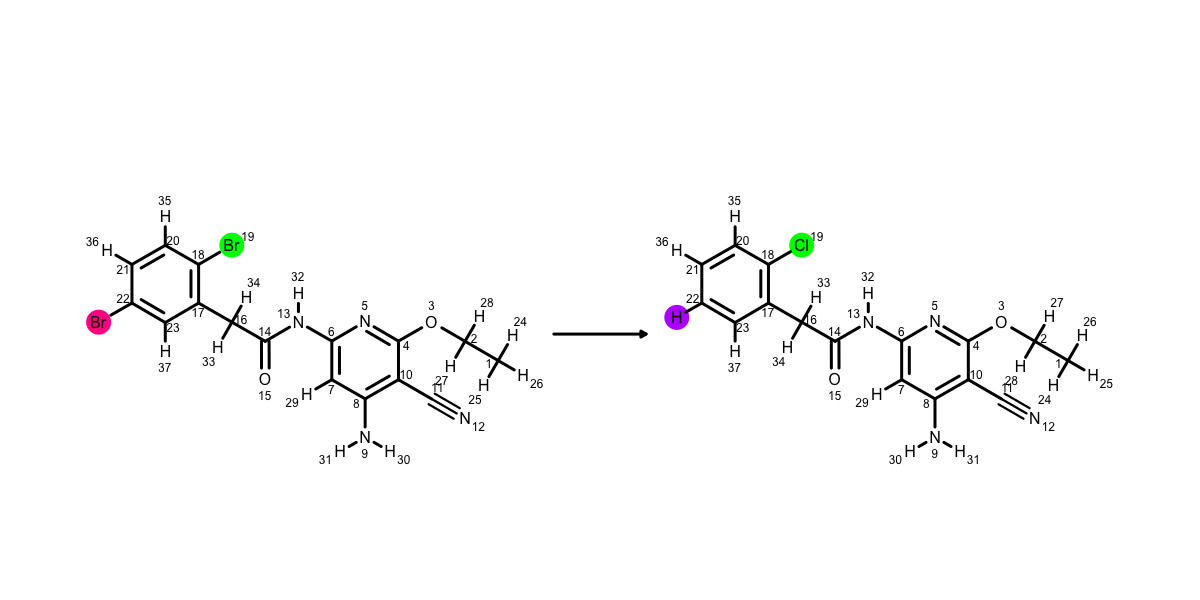

Jnk1 18 4


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


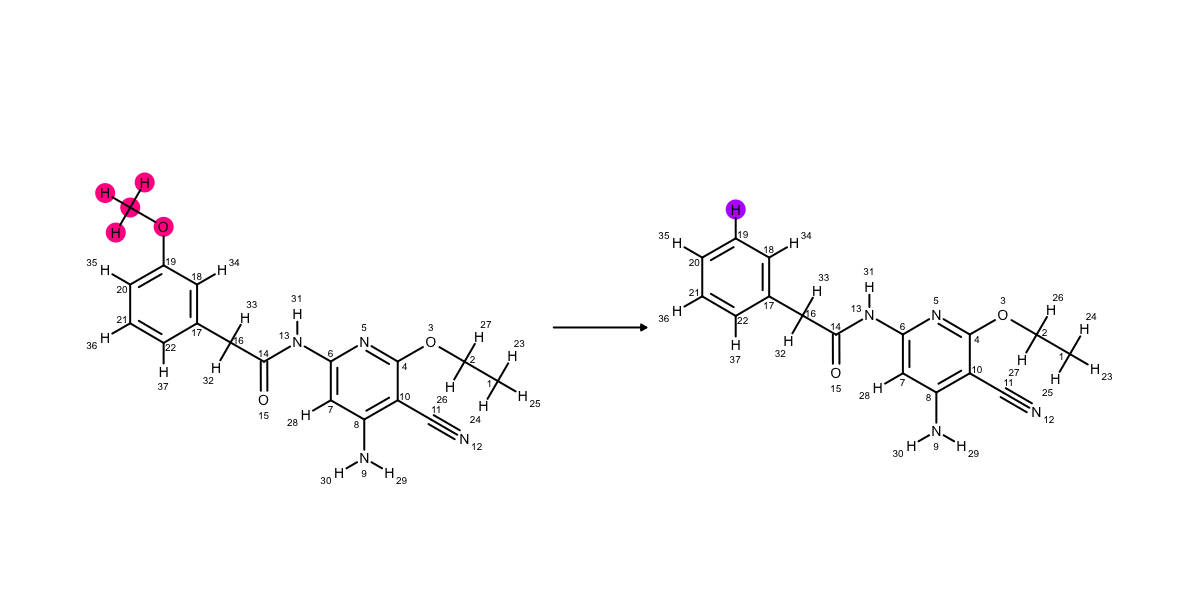

Jnk1 6 8


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


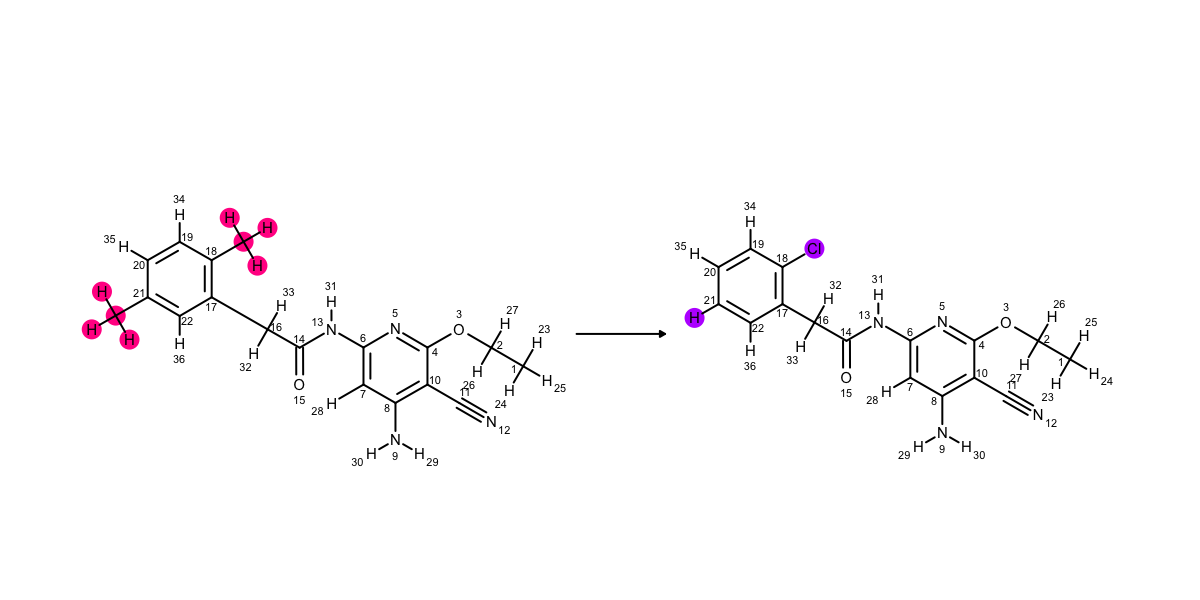

Jnk1 20 14


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))
/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type oh not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


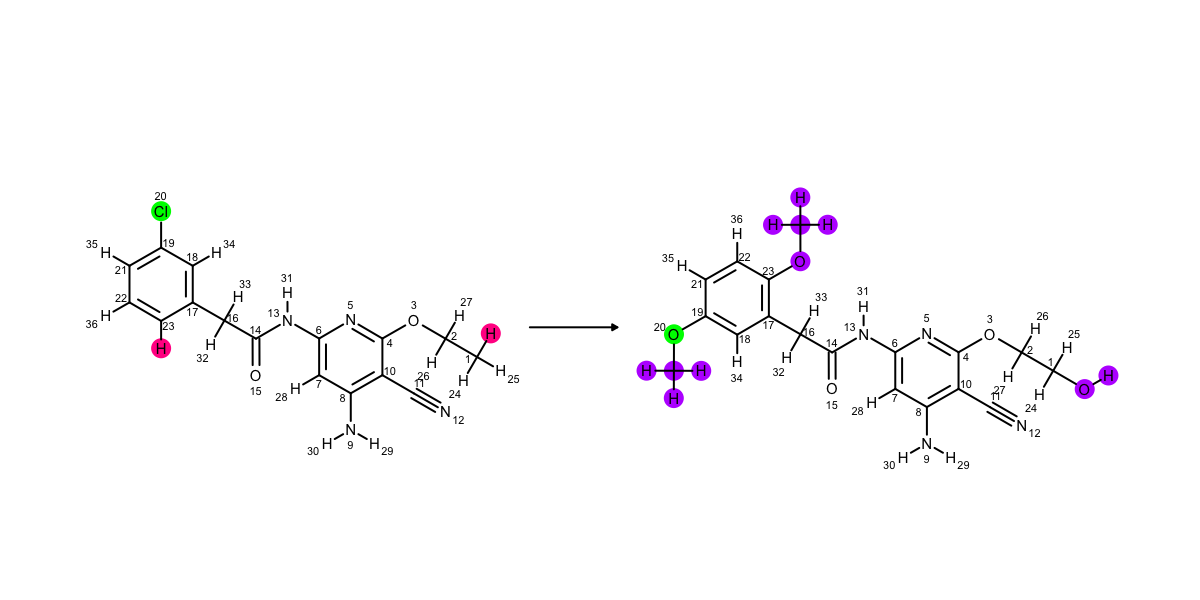

Jnk1 16 14


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))
/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type oh not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


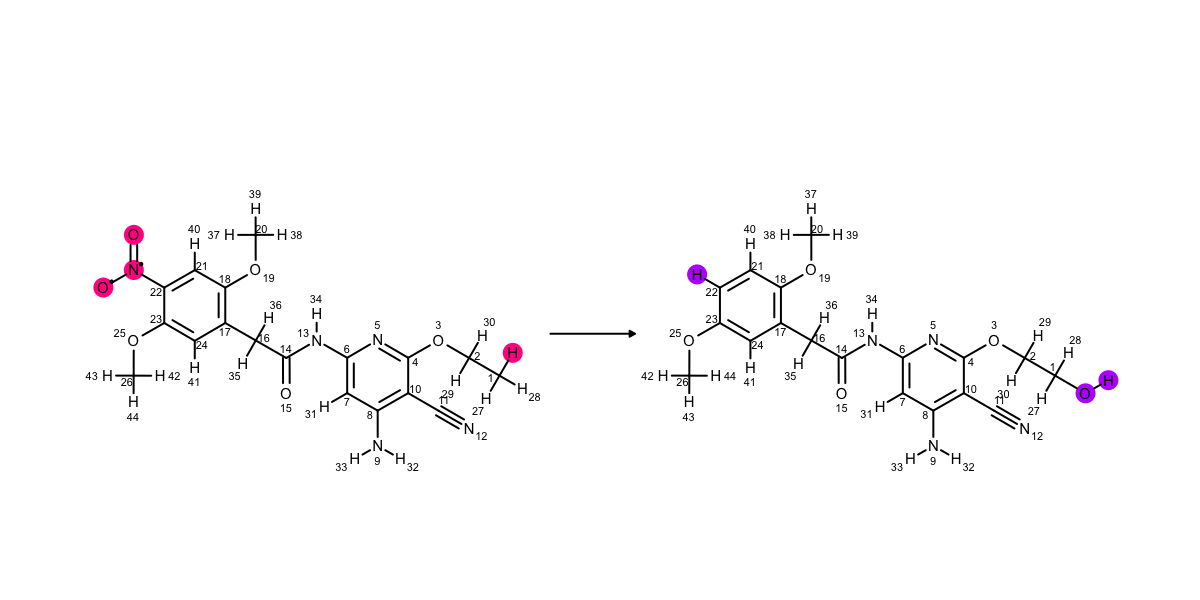

Jnk1 20 8


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


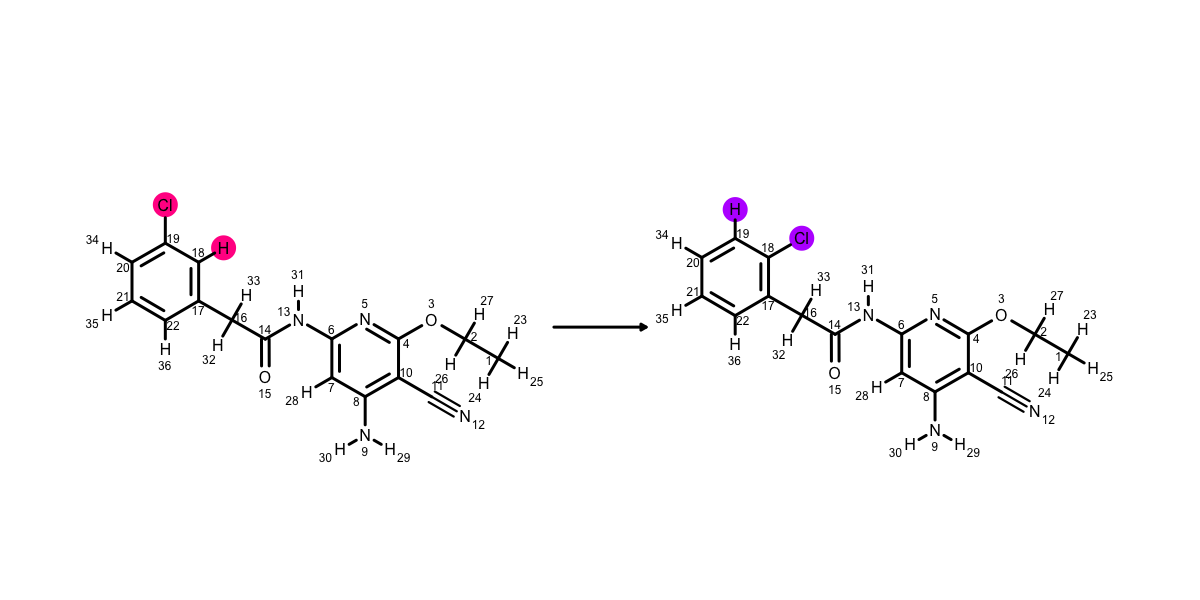

Jnk1 11 14


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))
/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type oh not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


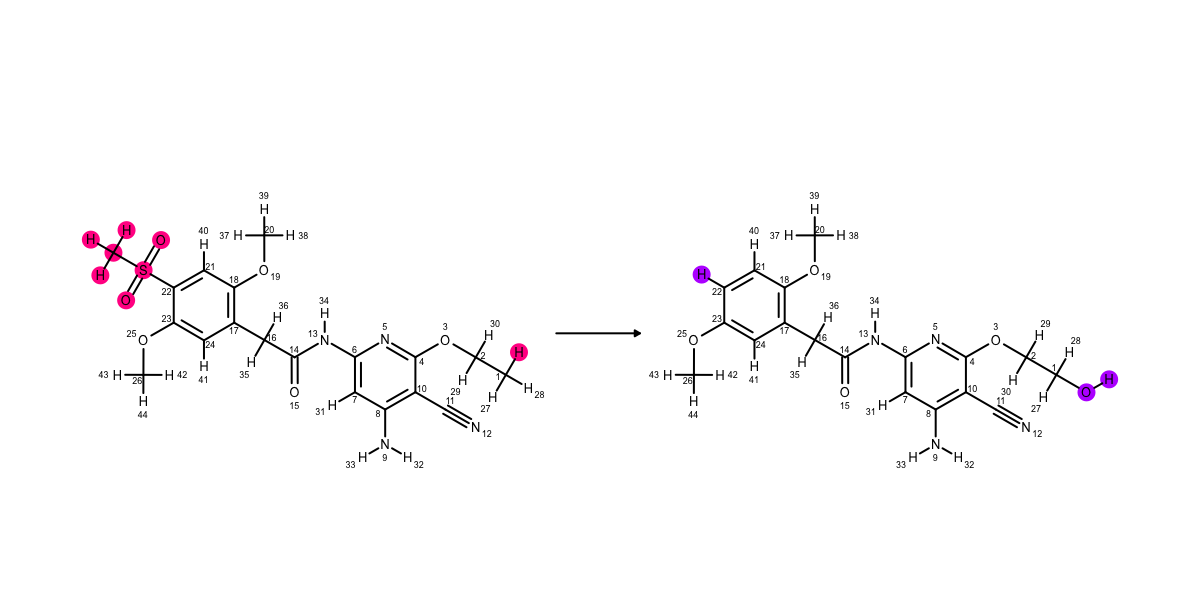

Jnk1 2 4


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


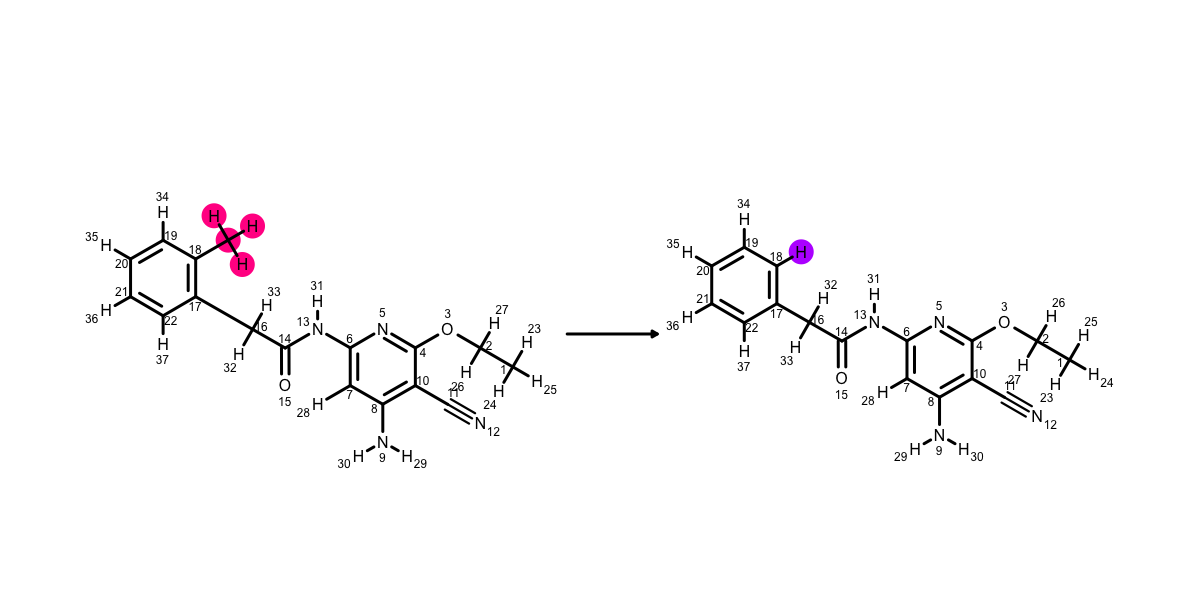

Jnk1 17 3


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


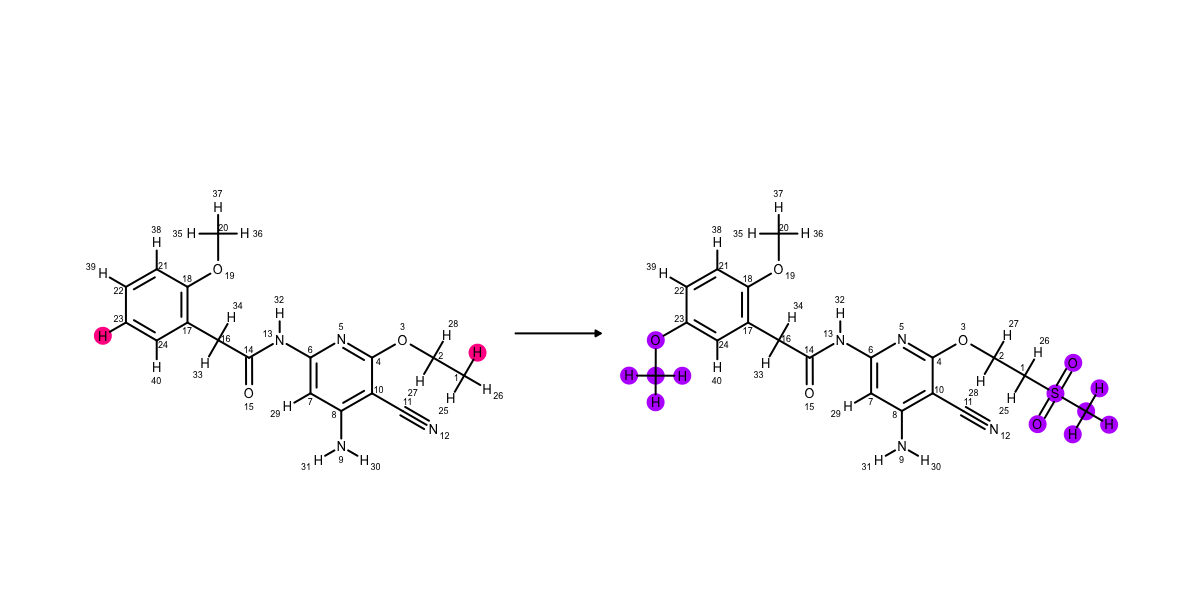

Jnk1 11 1


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


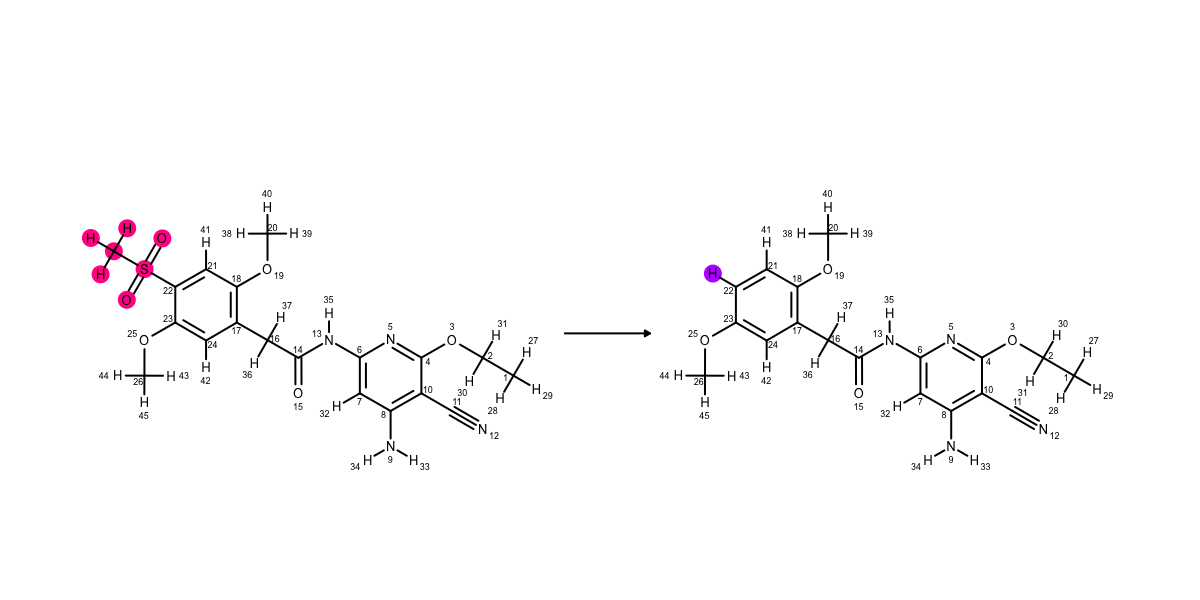

Jnk1 20 18


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


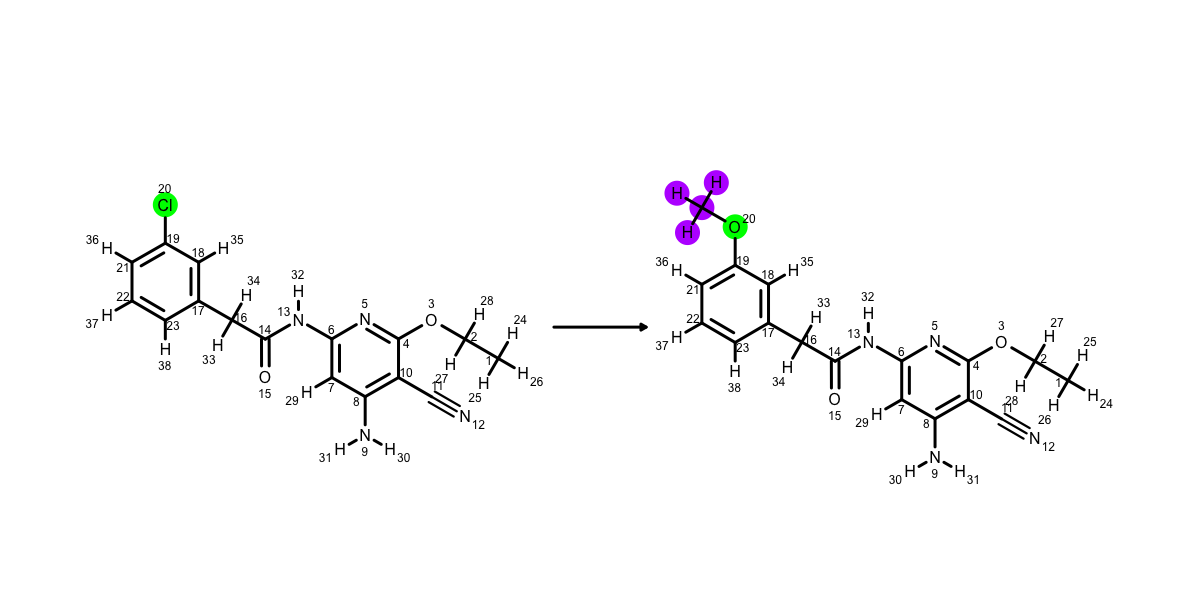

Jnk1 20 15


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


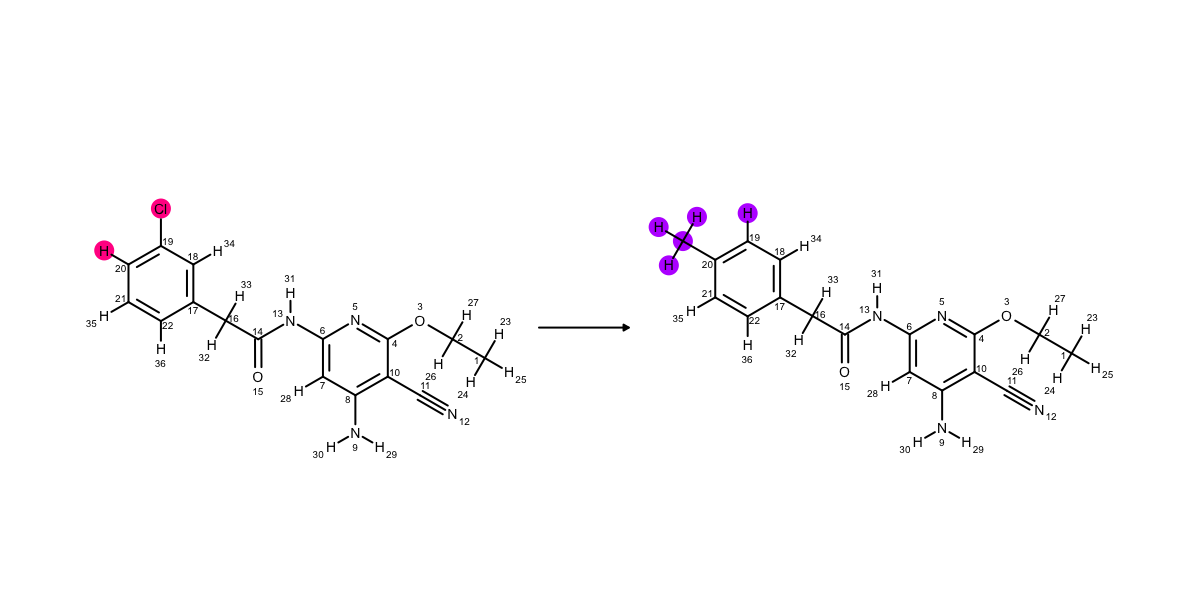

Jnk1 17 4


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


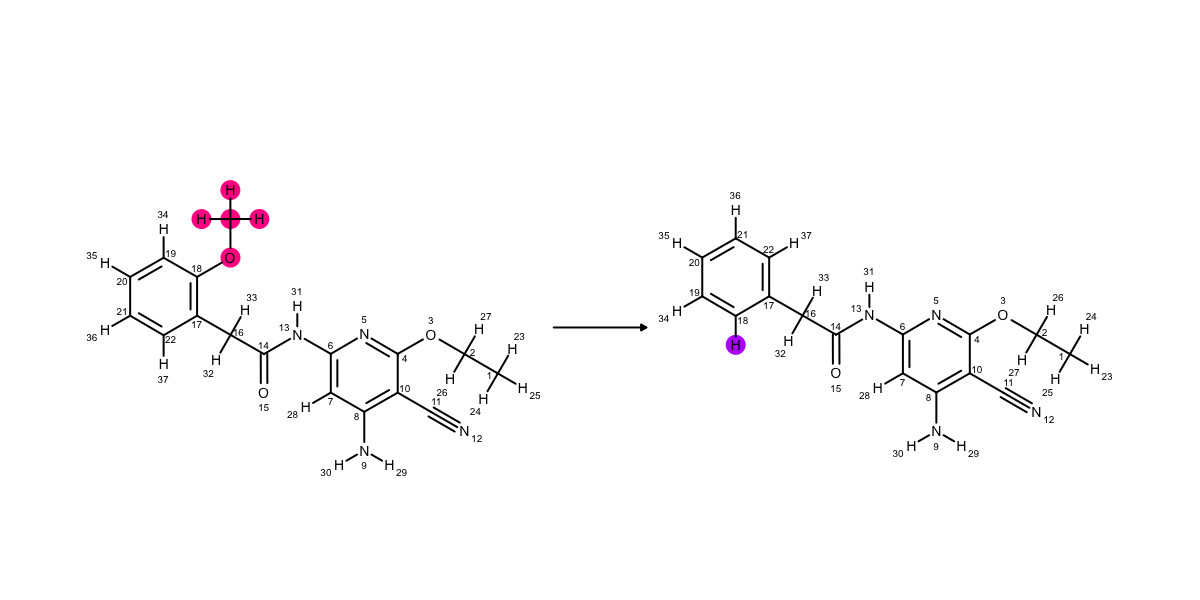

Jnk1 0 13


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


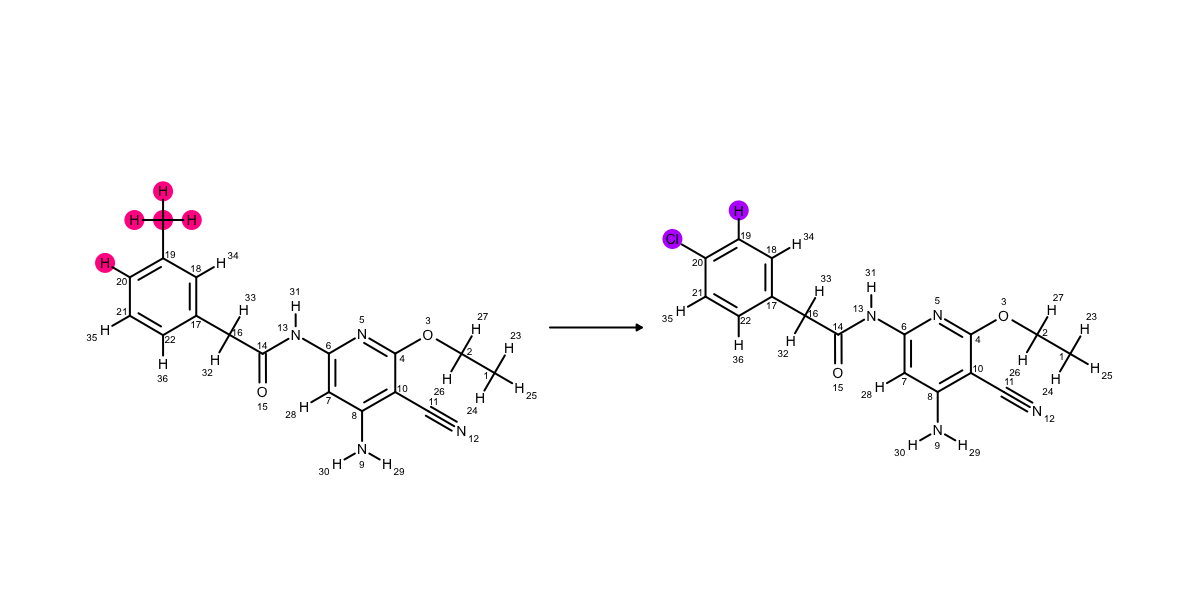

Jnk1 1 10


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))
/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 2-( contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


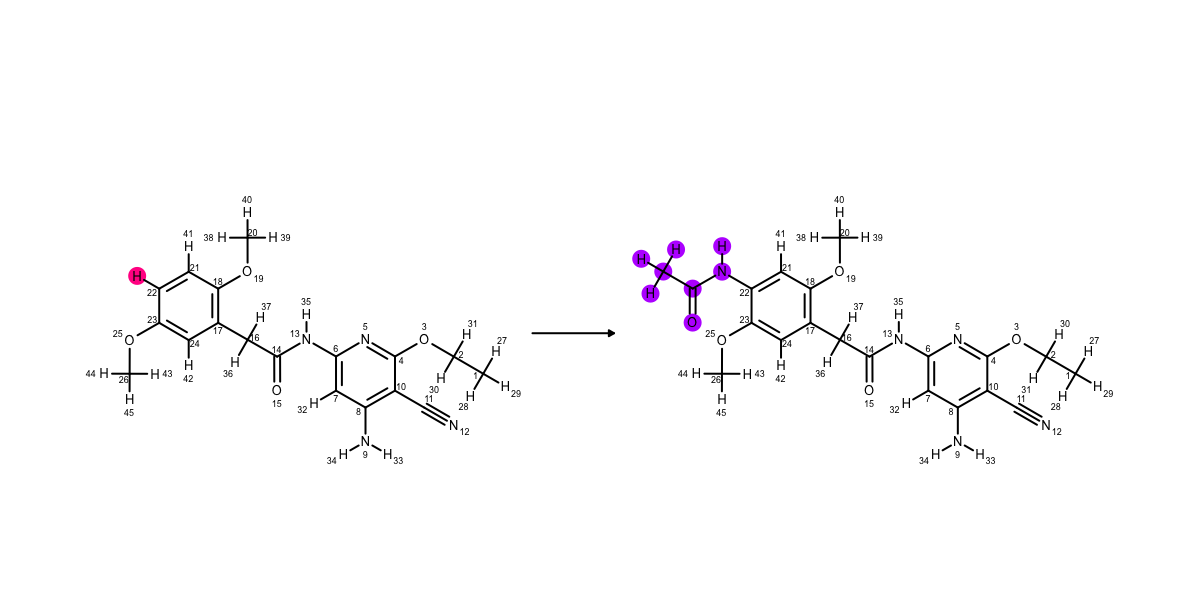

Jnk1 20 13


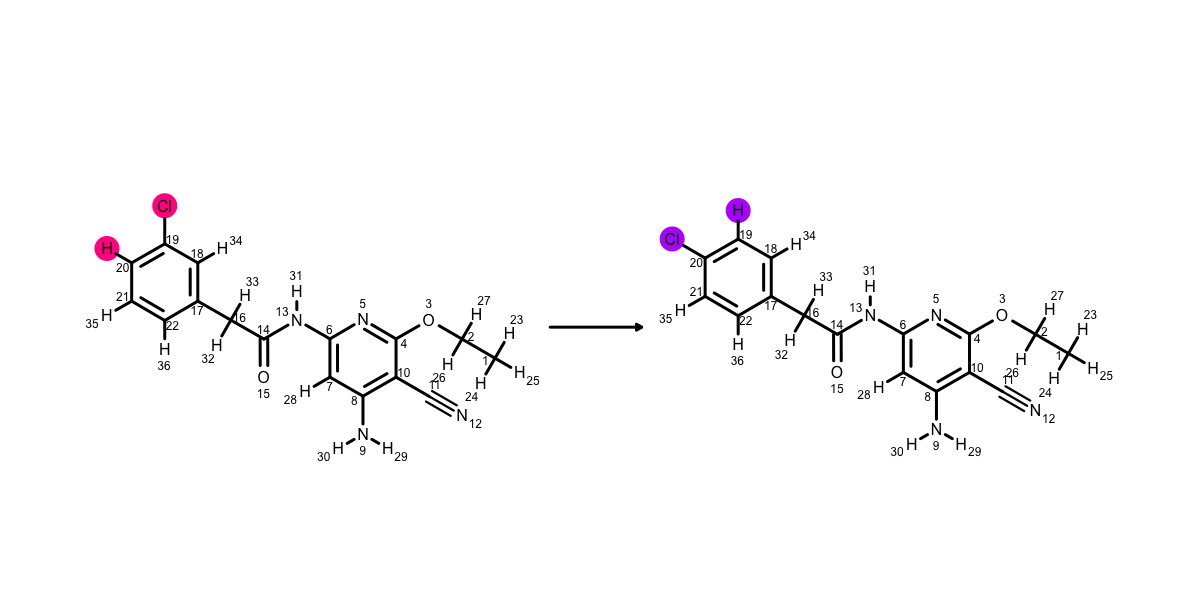

Jnk1 17 12


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


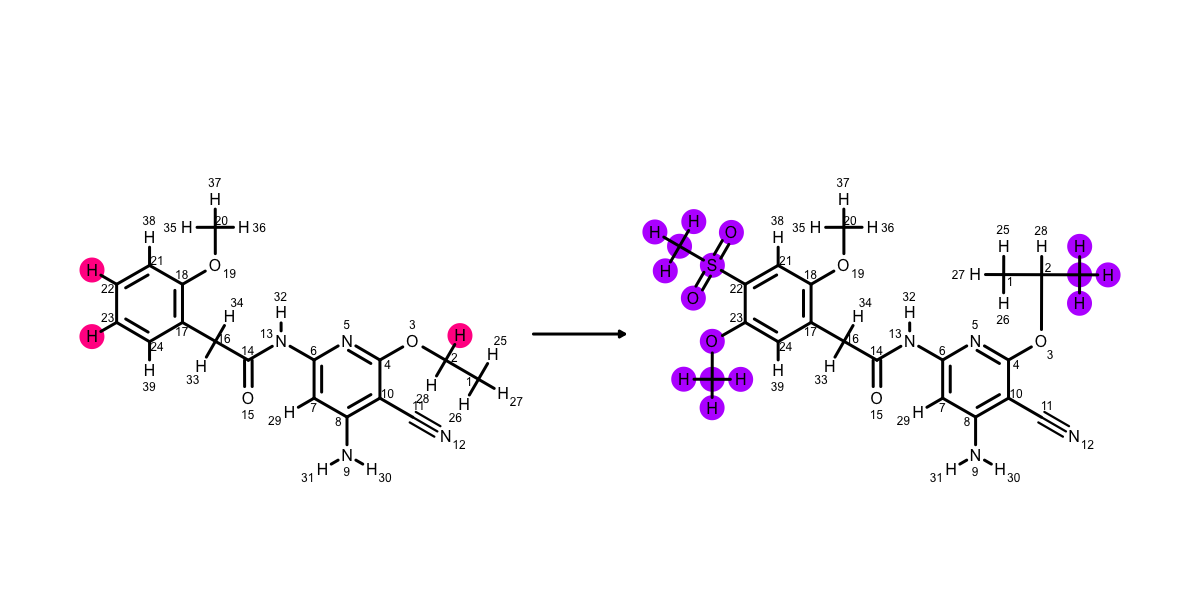

Jnk1 10 17


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue 2-( contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))
/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


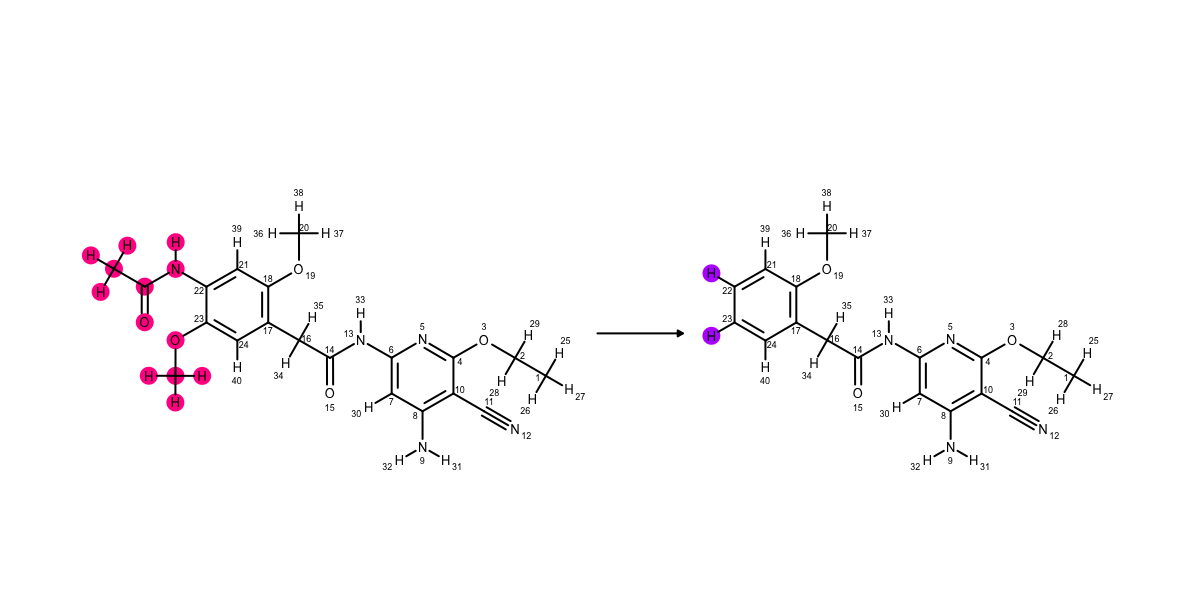

Jnk1 20 1


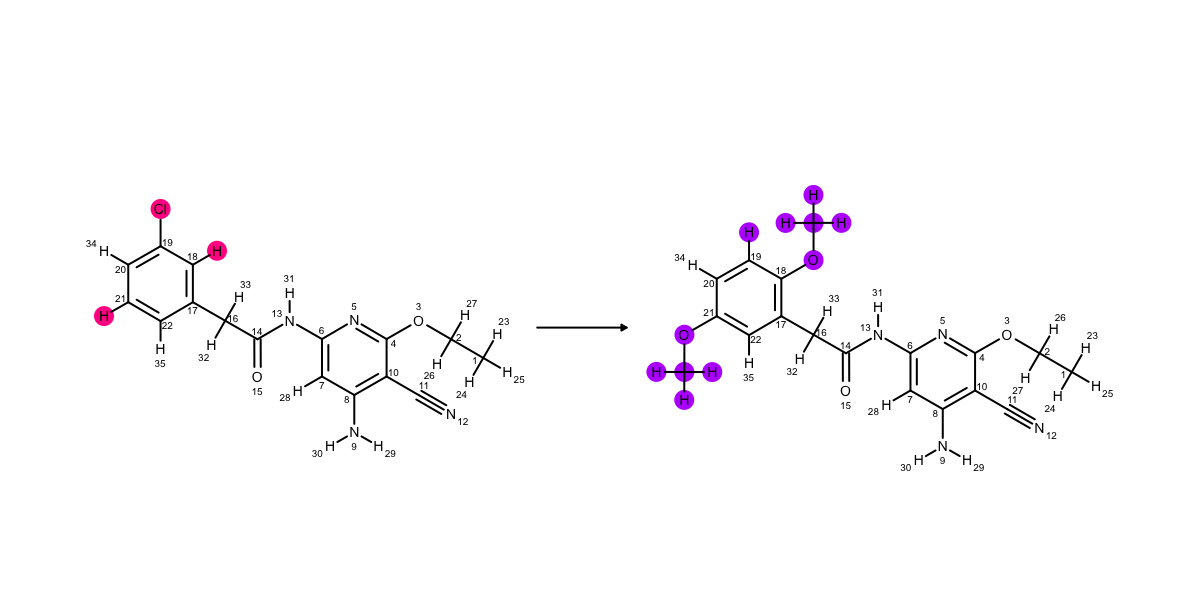

Jnk1 5 4


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


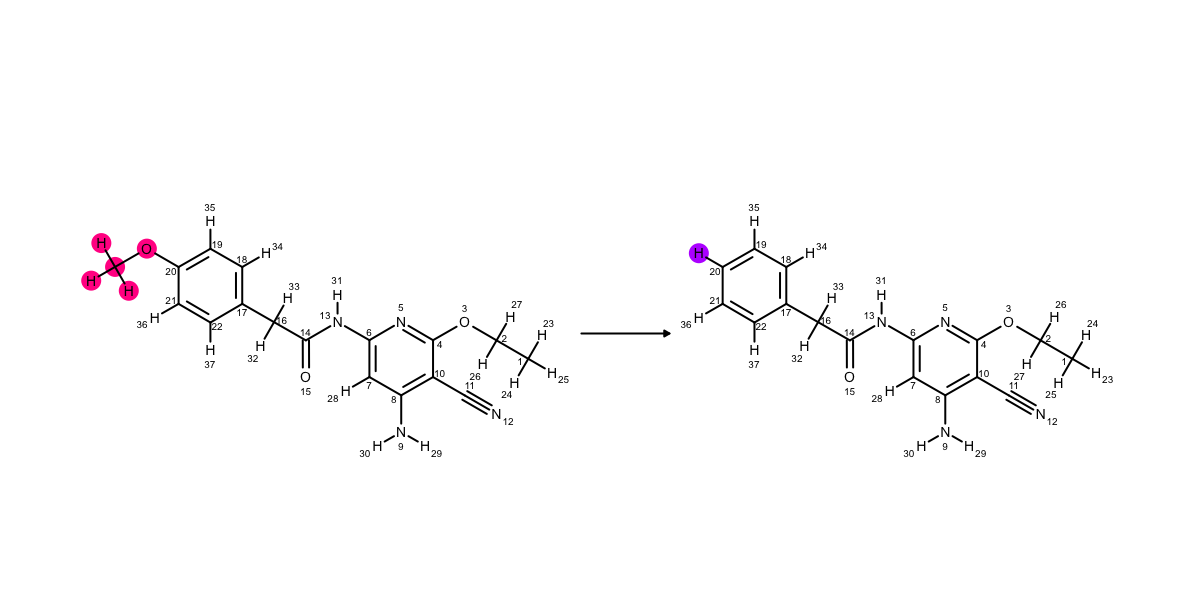

Jnk1 7 17


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


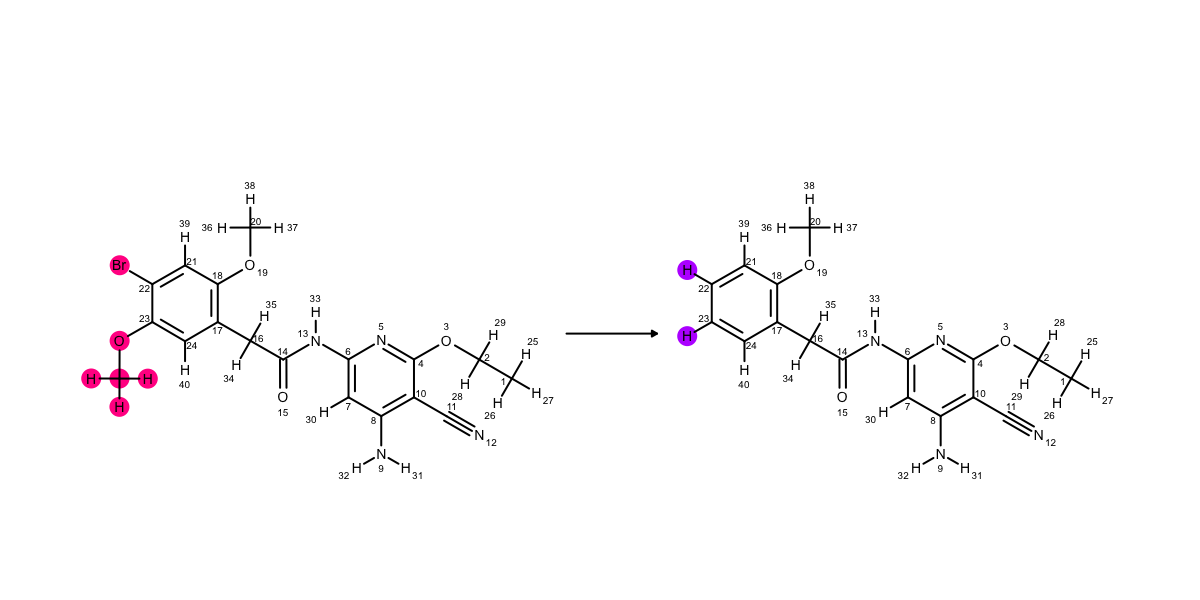

Jnk1 13 15


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


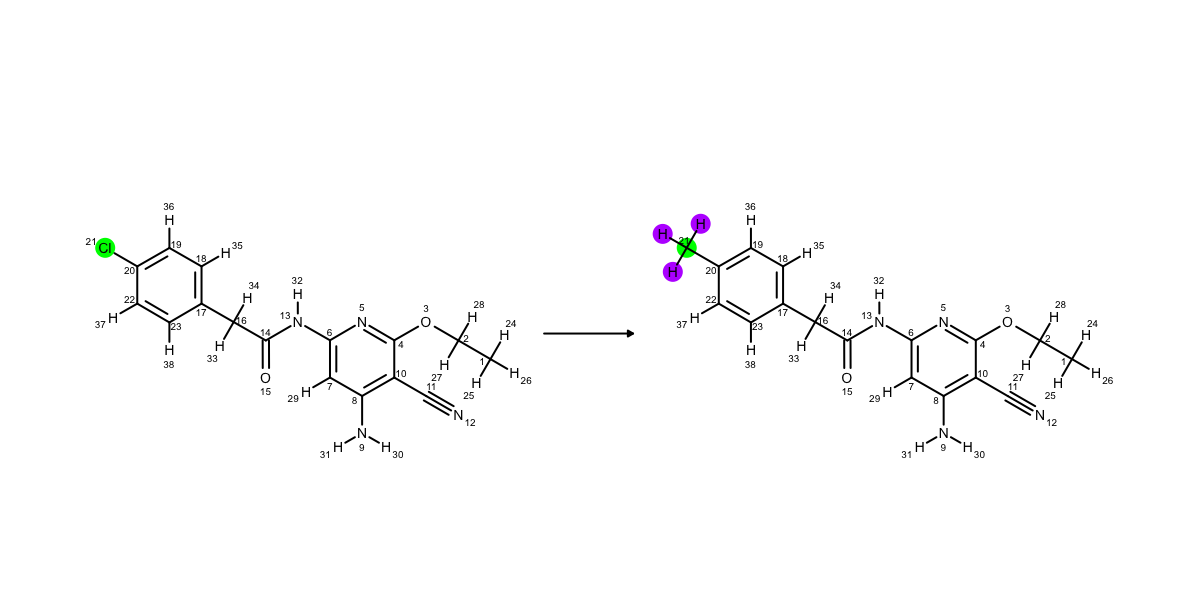

Jnk1 9 1


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


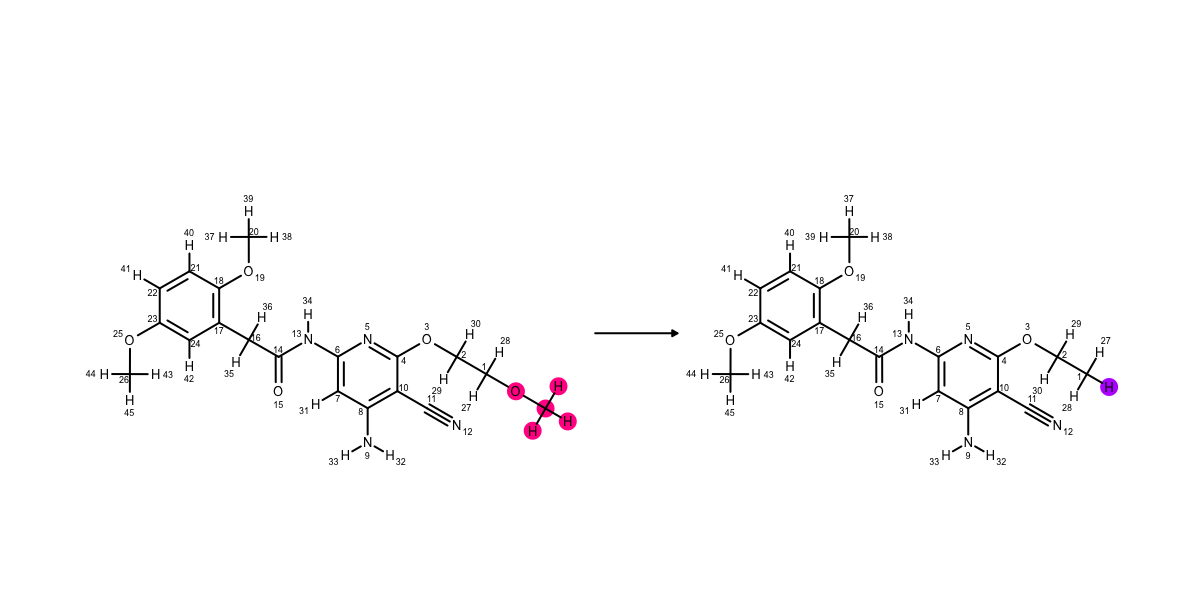

Jnk1 19 4


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


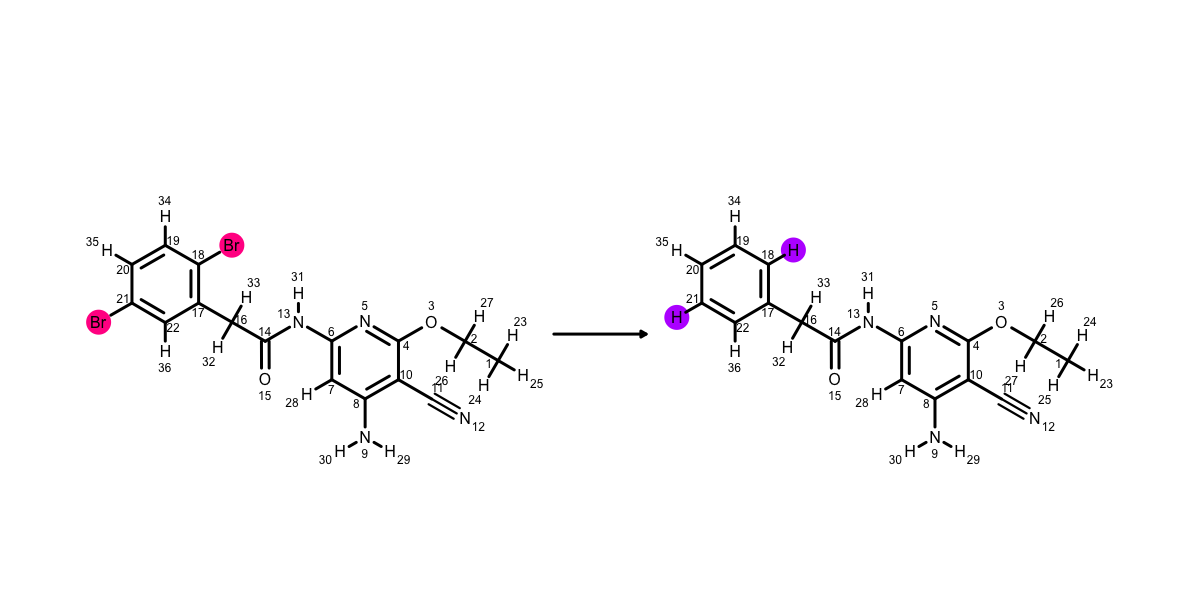

Jnk1 20 2


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


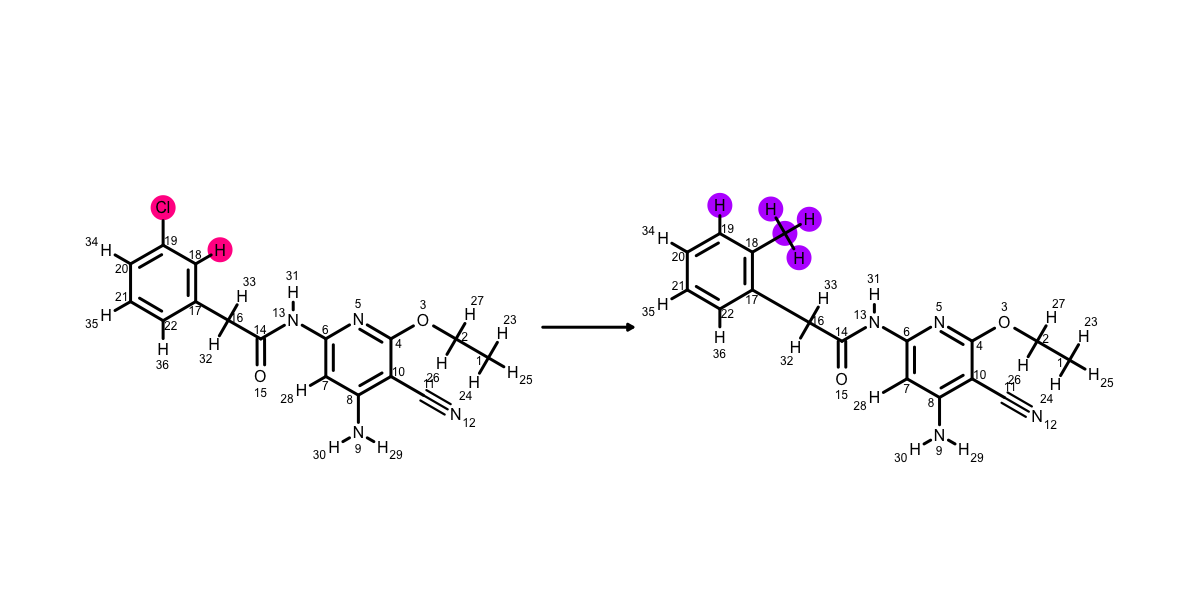

Jnk1 20 3


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


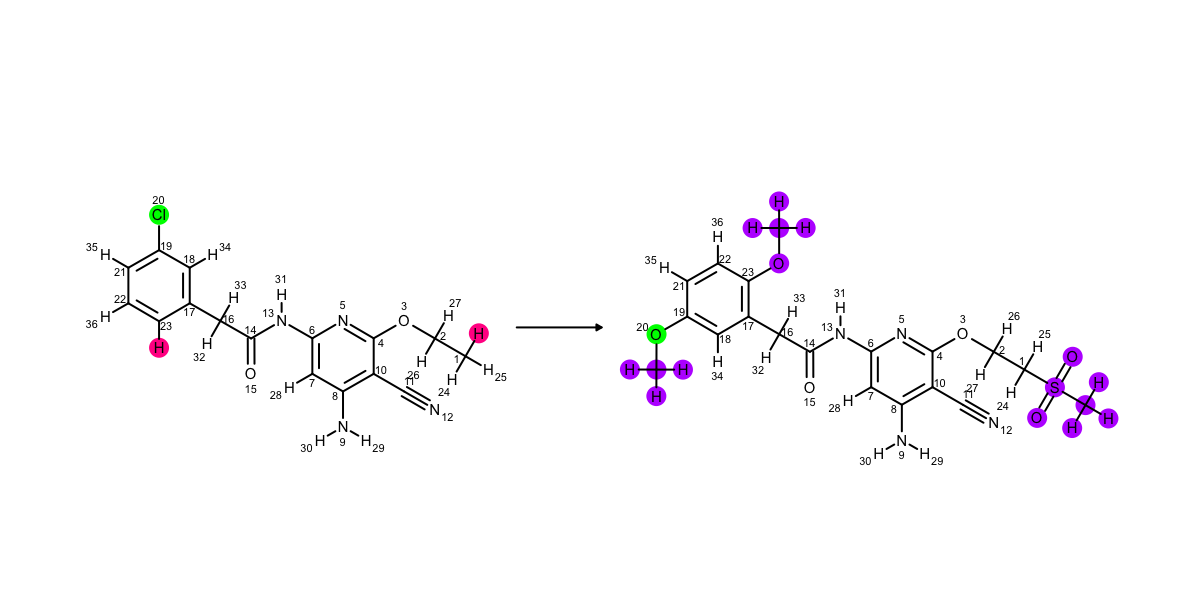

Jnk1 20 9


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


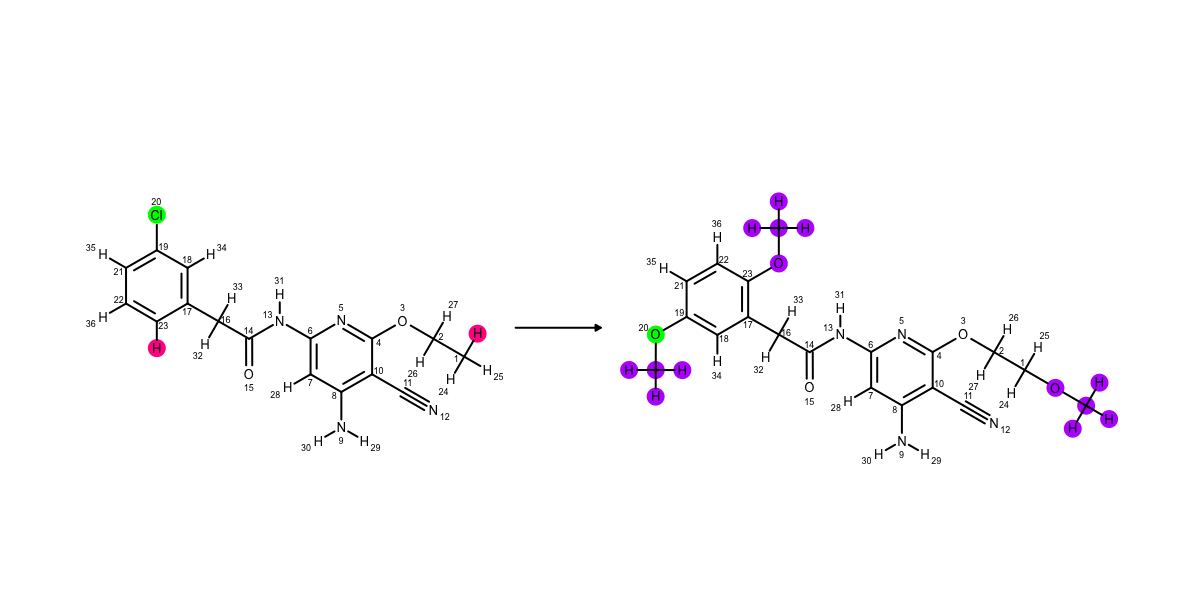

Jnk1 16 1


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


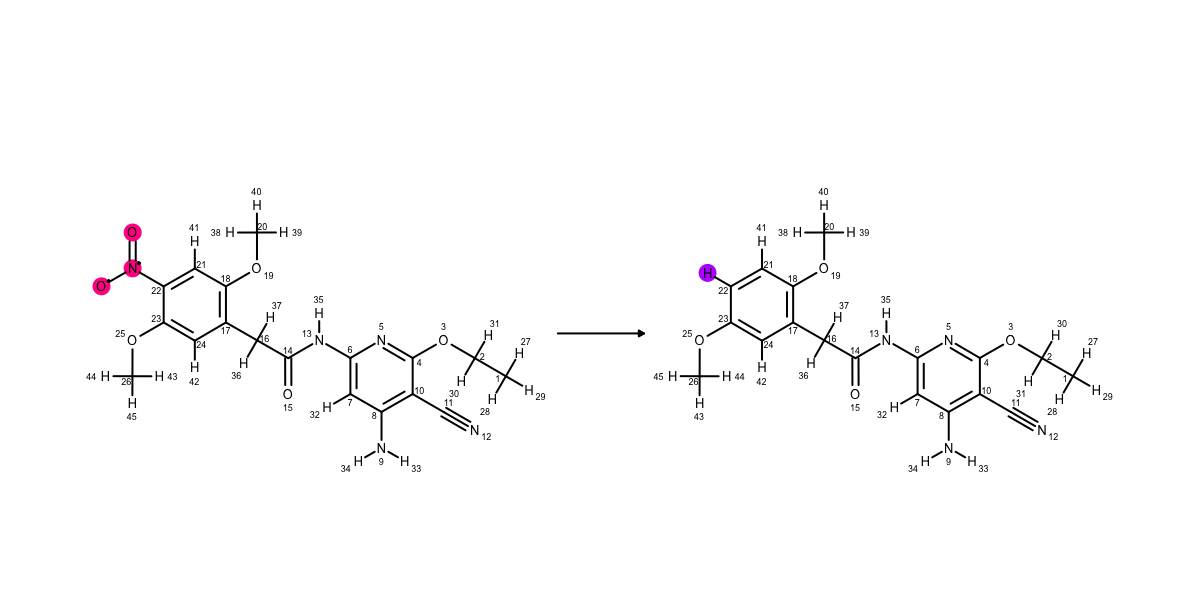

Jnk1 6 4


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ParmEd-3.1.0-py3.6-macosx-10.7-x86_64.egg/parmed/openmm/parameters.py:127: UserWarning: Residue ~{N contains atom type c3 not found in parameter set and will be dropped.
  warnings.warn('Residue {} contains atom type {} not found in parameter set and will be dropped.'.format(residue.name, atom.type))


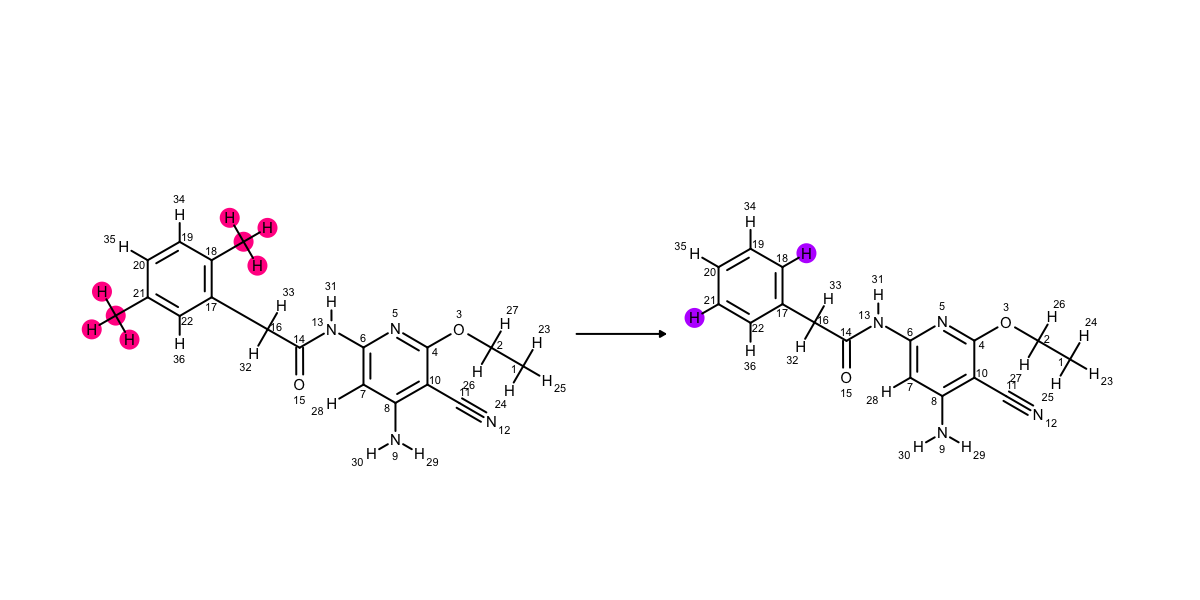

In [7]:
plot_all_mappings(Jnk1)